<a href="https://colab.research.google.com/github/AimanFariz/Soccer-Analytics/blob/main/NCAA_D1_F23_ACC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To everyone who's going to see and use this code or play around with this Colab file, here are some contexts:

- This file is started by me, Aiman Fariz Zaqwan Bin Akmal Hizam, as part of my involvement in the Pathway to Sports Academy at The University of Tulsa.
- The database used for this file is created by me and my brother. We only collected overall season stats and not complete game stats since that would be too much work (lol). The results are collected from official NCAA, ESPN, and Wikipedia webpage.
- If you find any mistakes in the names or scorelines, please email me at aba9132@utulsa.edu and kindly let me know, or you can also choose to fix it yourself, whichever works for you.
- Some terminology here: 'wpc' is Win Percentage, 'pyth' is Pythagorean Expectation.

Enjoy!

In [1]:
# Load the packages

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/Pathway to Sports - MSOC Data Analytics/F23/ACC")

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
# Import the display module from IPython
from IPython.display import display

# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', None)

ACC_F23 = pd.read_csv("NCAA D1 Soccer Fall 23 - ACC.csv")

# data.head() # run this to see first 5 columns

print(ACC_F23.columns.tolist()) # run this line to only see column titles

Mounted at /content/drive
['Date', 'Home Team', 'Away Team', 'HTHG', 'HTAG', 'FTHG', 'FTAG', 'Result', 'Match Type', 'Home Full Name', 'Away Full Name']


In [ ]:
# making sure i'm in the correct folder
!ls /content/drive/My\ Drive/Pathway\ to\ Sports\ -\ MSOC\ Data\ Analytics/

'coursera '   F23  'Master Resources and Links.gdoc'  'NCAA D1 Soccer Fall 23.gsheet'   Tulsa


In [2]:
ACC_F23['hwinvalue'] = np.where(ACC_F23['Result']=='H',1,np.where(ACC_F23['Result']=='D',0.5,0))
ACC_F23['awinvalue'] = np.where(ACC_F23['Result']=='A',1,np.where(ACC_F23['Result']=='D',0.5,0))
# ACC_F23['hleadvalue'] = np.where(ACC_F23['HTHG']>ACC_F23['HTAG'],1,0)
# ACC_F23['aleadvalue'] = np.where(ACC_F23['HTAG']>ACC_F23['HTHG'],1,0)
# ACC_F23['htleader'] = ACC_F23['HTHG'] > ACC_F23['HTAG']
# ACC_F23['comeback'] = (ACC_F23['htleader'] & (ACC_F23['FTHG'] < ACC_F23['FTAG'])) | (~ACC_F23['htleader'] & (ACC_F23['FTHG'] > ACC_F23['FTAG']))

# ACC_F23['losing_at_half'] = ACC_F23['HTHG'] < ACC_F23['HTAG']
# ACC_F23['comeback'] = ACC_F23['losing_at_half'] & ((ACC_F23['FTHG'] > ACC_F23['FTAG']) | (ACC_F23['FTHG'] == ACC_F23['FTAG']))


ACC_F23['count'] = 1
ACC_F23

,Date,Home Team,Away Team,HTHG,HTAG,FTHG,FTAG,Result,Match Type,Home Full Name,Away Full Name,hwinvalue,awinvalue,count
0,8/24/2023,BC,MERMCK,0,0,1,0,H,Non-Conference,Boston College,Merrimack University,1.0,0.0,1
1,8/24/2023,VT,UCLA,0,1,1,4,A,Non-Conference,Virginia Institute of Technology,"University of California, Los Angeles",0.0,1.0,1
2,8/24/2023,UVA,IONA,0,0,1,0,H,Non-Conference,University of Virginia,Iona College,1.0,0.0,1
3,8/24/2023,CLEM,UCF,1,1,1,2,A,Non-Conference,Clemson University,University of Central Florida,0.0,1.0,1
4,8/24/2023,PITT,PENNST,0,1,1,1,D,Non-Conference,University of Pittsburgh,Pennsylvania State University,0.5,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,10/27/2023,LOUIS,WAKE,2,1,2,2,D,Conference,University of Louisville,Wake Forest University,0.5,0.5,1
138,10/27/2023,N DAME,PITT,2,0,6,0,H,Conference,University of Notre Dame,University of Pittsburgh,1.0,0.0,1
139,10/27/2023,DUKE,VT,1,1,7,1,H,Conference,Duke University,Virginia Institute of Technology,1.0,0.0,1
140,10/27/2023,NC ST,CLEM,0,0,1,1,D,Conference,North Carolina State University,Clemson University,0.5,0.5,1


In [3]:
# this code snippet groups strictly ACC teams
# assuming your DataFrame is called ACC_F23
ACC_F23_conference_matches = ACC_F23[ACC_F23['Match Type'] == 'Conference']
# print(ACC_F23_conference_matches.columns.tolist())
ACC_F23_conference_matches

,Date,Home Team,Away Team,HTHG,HTAG,FTHG,FTAG,Result,Match Type,Home Full Name,Away Full Name,hwinvalue,awinvalue,count
47,9/8/2023,NC ST,BC,1,0,2,0,H,Conference,North Carolina State University,Boston College,1.0,0.0,1
48,9/8/2023,VT,UNC,0,0,1,1,D,Conference,Virginia Institute of Technology,"University of North Carolina, Chapel Hill",0.5,0.5,1
49,9/8/2023,DUKE,UVA,1,0,2,0,H,Conference,Duke University,University of Virginia,1.0,0.0,1
50,9/8/2023,SYR,LOUIS,2,1,2,2,D,Conference,Syracuse University,University of Louisville,0.5,0.5,1
51,9/9/2023,N DAME,CLEM,2,2,3,2,H,Conference,University of Notre Dame,Clemson University,1.0,0.0,1
52,9/9/2023,PITT,WAKE,1,0,3,0,H,Conference,University of Pittsburgh,Wake Forest University,1.0,0.0,1
58,9/15/2023,BC,PITT,0,0,0,0,D,Conference,Boston College,University of Pittsburgh,0.5,0.5,1
59,9/15/2023,CLEM,DUKE,1,0,2,0,H,Conference,Clemson University,Duke University,1.0,0.0,1
60,9/15/2023,UNC,N DAME,1,0,1,1,D,Conference,"University of North Carolina, Chapel Hill",University of Notre Dame,0.5,0.5,1
61,9/15/2023,LOUIS,VT,1,1,1,2,A,Conference,University of Louisville,Virginia Institute of Technology,0.0,1.0,1


In [5]:
# This code snippet is Home, for all ACC matches including non-conference and conference
ACC_F23_Home = ACC_F23.groupby(['Home Team'])[['count','hwinvalue','HTHG','HTAG','FTHG','FTAG']].sum().reset_index()
ACC_F23_Home = ACC_F23_Home.rename(columns={"Home Team":"Teams", "count":"Played Home","FTHG":"Scored","FTAG":"Conceded"})
ACC_F23_Home

# This code snippet is Away, for all ACC matches including non-conference and conference
ACC_F23_Away = ACC_F23.groupby(['Away Team'])[['count','awinvalue','HTAG','HTHG','FTAG','FTHG']].sum().reset_index()
ACC_F23_Away = ACC_F23_Away.rename(columns={"Away Team":"Teams", "count":"Played Home", "FTAG":"Scored","FTHG":"Conceded"})
ACC_F23_Away

# # This code snippet is Home, for all ACC conference matches
ACC_F23_Conference_Home = ACC_F23_conference_matches.groupby(['Home Team'])[['count','hwinvalue','HTHG','HTAG','FTHG','FTAG']].sum().reset_index()
ACC_F23_Conference_Home = ACC_F23_Conference_Home.rename(columns={"Home Team":"Teams", "count":"Played","FTHG":"Scored","FTAG":"Conceded"})
# print(ACC_F23_Conference_Home)

ACC_F23_Conference_Home = ACC_F23_conference_matches.groupby(['Home Team'])[['count','hwinvalue','HTHG','HTAG','FTHG','FTAG']].sum().reset_index()
ACC_F23_Conference_Home = ACC_F23_Conference_Home.rename(columns={"Home Team":"Teams", "count":"Ph", "FTHG":"Scored","FTAG":"Conceded"})
ACC_F23_Conference_Home

# This code snippet is Away, for all ACC conference matches
ACC_F23_Conference_Away = ACC_F23_conference_matches.groupby(['Away Team'])[['count','awinvalue','HTAG','HTHG','FTAG','FTHG']].sum().reset_index()
ACC_F23_Conference_Away = ACC_F23_Conference_Away.rename(columns={"Away Team":"Teams", "count":"Pa", "FTAG":"Scored","FTHG":"Conceded"})
# print(ACC_F23_Conference_Away)

In [6]:
# For conference matches only

ACC_F23_conference_Merged = pd.merge(ACC_F23_Conference_Away,ACC_F23_Conference_Home, on = ['Teams'])
ACC_F23_conference_Merged['W'] = ACC_F23_conference_Merged['awinvalue'] + ACC_F23_conference_Merged['hwinvalue']
ACC_F23_conference_Merged['G'] = ACC_F23_conference_Merged['Ph'] + ACC_F23_conference_Merged['Pa']
ACC_F23_conference_Merged['GF'] = ACC_F23_conference_Merged['Scored_x'] + ACC_F23_conference_Merged['Scored_y']
ACC_F23_conference_Merged['GA'] = ACC_F23_conference_Merged['Conceded_x'] + ACC_F23_conference_Merged['Conceded_y']
ACC_F23_conference_Merged['HTGA'] = ACC_F23_conference_Merged['HTAG_x'] + ACC_F23_conference_Merged['HTAG_y']
ACC_F23_conference_Merged['HTGF'] = ACC_F23_conference_Merged['HTHG_x'] + ACC_F23_conference_Merged['HTHG_y']
ACC_F23_conference_Merged['HTGD'] = ACC_F23_conference_Merged['HTGF'] - ACC_F23_conference_Merged['HTGA']
ACC_F23_conference_Merged['GD'] = ACC_F23_conference_Merged['GF'] - ACC_F23_conference_Merged['GA']
ACC_F23_conference_Merged['2GF'] = ACC_F23_conference_Merged['GF'] - ACC_F23_conference_Merged['HTGF']
ACC_F23_conference_Merged['2GA'] = ACC_F23_conference_Merged['GA'] - ACC_F23_conference_Merged['HTGA']
ACC_F23_conference_Merged['2GD'] = ACC_F23_conference_Merged['2GF'] - ACC_F23_conference_Merged['2GA']
ACC_F23_conference_Merged['Change_GD'] = ACC_F23_conference_Merged['2GD'] - ACC_F23_conference_Merged['HTGD']
ACC_F23_conference_Merged['awpc'] = ACC_F23_conference_Merged['awinvalue'] / ACC_F23_conference_Merged['Pa'] *100
ACC_F23_conference_Merged['hwpc'] = ACC_F23_conference_Merged['hwinvalue'] / ACC_F23_conference_Merged['Ph'] *100
ACC_F23_conference_Merged['awpc:hwpc'] = ACC_F23_conference_Merged['awpc'] / ACC_F23_conference_Merged['hwpc']
ACC_F23_conference_Merged['wpc'] = ACC_F23_conference_Merged['W']/ACC_F23_conference_Merged['G']
ACC_F23_conference_Merged['pyth'] = ACC_F23_conference_Merged['GF']**2/(ACC_F23_conference_Merged['GF']**2 + ACC_F23_conference_Merged['GA']**2)
ACC_F23_conference_Merged['pyth_ht'] = ACC_F23_conference_Merged['HTGF']**2/(ACC_F23_conference_Merged['HTGF']**2 + ACC_F23_conference_Merged['HTGA']**2)
ACC_F23_conference_Merged['pyth_ht'] = ACC_F23_conference_Merged['HTGF']**2/(ACC_F23_conference_Merged['HTGF']**2 + ACC_F23_conference_Merged['HTGA']**2)
ACC_F23_conference_Merged['pyth_h2'] = ACC_F23_conference_Merged['2GF']**2/(ACC_F23_conference_Merged['2GF']**2 + ACC_F23_conference_Merged['2GA']**2)
ACC_F23_conference_Merged['pyth_diff'] = ACC_F23_conference_Merged['pyth_h2'] - ACC_F23_conference_Merged['pyth_ht']
ACC_F23_conference_Merged

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,BC,4,0.0,1,5,0,10,4,1.5,1,2,2,3,1.5,8,2,13,3,6,3,-11,-4,10,-14,-17,0.0,37.5,0.000000,0.1875,0.023121,0.800000,0.137931,-0.662069
1,CLEM,4,1.0,2,2,4,6,4,4.0,6,0,14,1,5.0,8,18,7,2,8,6,11,10,5,5,-1,25.0,100.0,0.250000,0.6250,0.868633,0.941176,0.800000,-0.141176
2,DUKE,4,0.5,1,4,1,5,4,4.0,6,3,16,5,4.5,8,17,10,4,10,6,7,7,6,1,-5,12.5,100.0,0.125000,0.5625,0.742931,0.862069,0.576471,-0.285598
3,LOUIS,4,0.5,1,5,2,11,4,2.5,7,3,9,6,3.0,8,11,17,4,12,8,-6,-1,13,-14,-22,12.5,62.5,0.200000,0.3750,0.295122,0.900000,0.005882,-0.894118
4,N DAME,4,3.0,0,2,6,3,4,4.0,7,2,13,3,7.0,8,19,6,2,9,7,13,10,4,6,-1,75.0,100.0,0.750000,0.8750,0.909320,0.952941,0.862069,-0.090872
5,NC ST,4,0.5,1,7,5,11,4,1.5,2,2,4,7,2.0,8,9,18,3,9,6,-9,0,15,-15,-21,12.5,37.5,0.333333,0.2500,0.200000,0.900000,0.000000,-0.900000
6,PITT,4,0.5,3,6,3,11,4,3.0,1,1,6,1,3.5,8,9,12,4,7,3,-3,2,8,-6,-9,12.5,75.0,0.166667,0.4375,0.360000,0.753846,0.058824,-0.695023
7,SYR,4,2.0,4,4,6,7,4,2.5,4,3,7,6,4.5,8,13,13,7,8,1,0,5,6,-1,-2,50.0,62.5,0.800000,0.5625,0.500000,0.566372,0.409836,-0.156536
8,UNC,4,1.0,0,0,1,3,4,2.5,4,2,5,3,3.5,8,6,6,2,4,2,0,2,4,-2,-4,25.0,62.5,0.400000,0.4375,0.500000,0.800000,0.200000,-0.600000
9,UVA,4,1.5,2,3,5,6,4,4.0,6,1,9,2,5.5,8,14,8,3,9,6,6,5,5,0,-6,37.5,100.0,0.375000,0.6875,0.753846,0.900000,0.500000,-0.400000


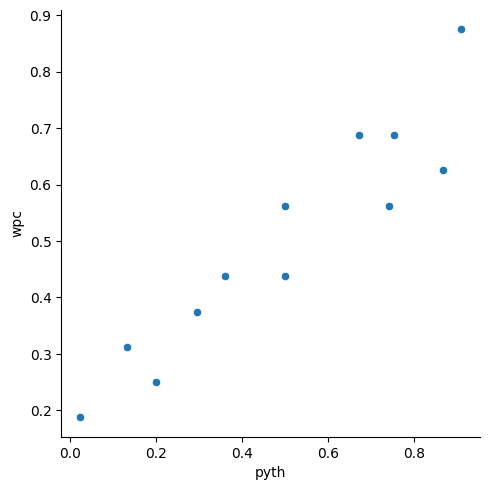

In [ ]:
sns.relplot(x="pyth", y="wpc", data = ACC_F23_conference_Merged)

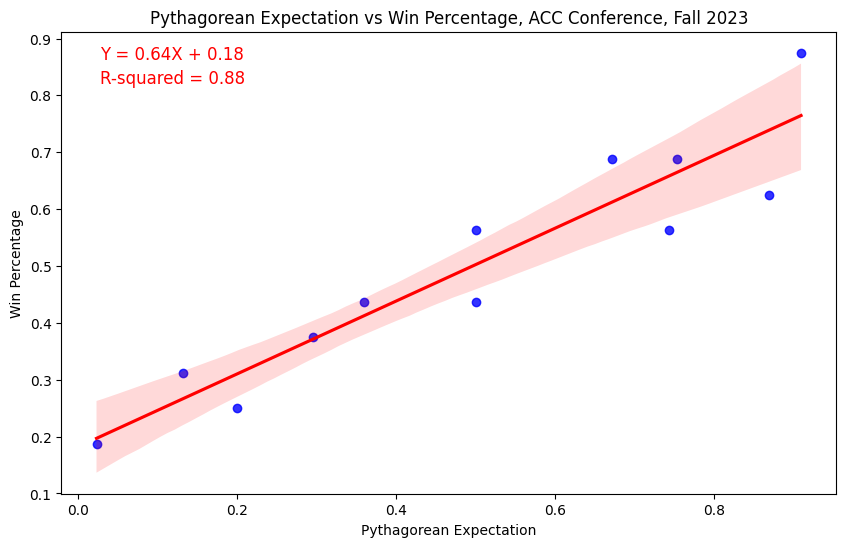

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Sample data
# Replace this with your actual DataFrame
# AAC_F23_conference_Merged = ...

# Plot the scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x="pyth", y="wpc", data=ACC_F23_conference_Merged, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# Calculate the regression line using numpy's polyfit
slope, intercept = np.polyfit(ACC_F23_conference_Merged['pyth'], ACC_F23_conference_Merged['wpc'], 1)

# Calculate R-squared value
X = sm.add_constant(ACC_F23_conference_Merged['pyth'])  # Add constant for intercept
model = sm.OLS(ACC_F23_conference_Merged['wpc'], X).fit()
r_squared = model.rsquared

# Annotate the plot with the regression equation and R-squared value
plt.text(0.05, 0.95, f'Y = {slope:.2f}X + {intercept:.2f}', fontsize=12, ha='left', va='center', transform=plt.gca().transAxes, color='red')
plt.text(0.05, 0.90, f'R-squared = {r_squared:.2f}', fontsize=12, ha='left', va='center', transform=plt.gca().transAxes, color='red')

plt.title('Pythagorean Expectation vs Win Percentage, ACC Conference, Fall 2023')
plt.xlabel('Pythagorean Expectation')
plt.ylabel('Win Percentage')
plt.show()


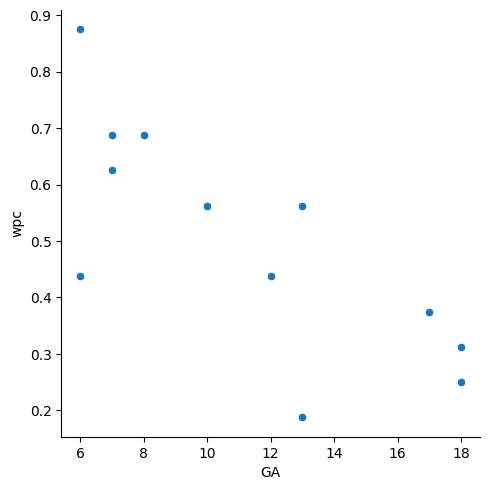

In [ ]:
sns.relplot(x="GA", y="wpc", data = ACC_F23_conference_Merged)

In [ ]:
pyth_lm = smf.ols(formula = 'GA ~ wpc', data=ACC_F23_conference_Merged).fit()
print(pyth_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     GA   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     13.53
Date:                Mon, 12 Aug 2024   Prob (F-statistic):            0.00426
Time:                        15:27:51   Log-Likelihood:                -29.722
No. Observations:                  12   AIC:                             63.44
Df Residuals:                      10   BIC:                             64.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.8707      2.514      7.903      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


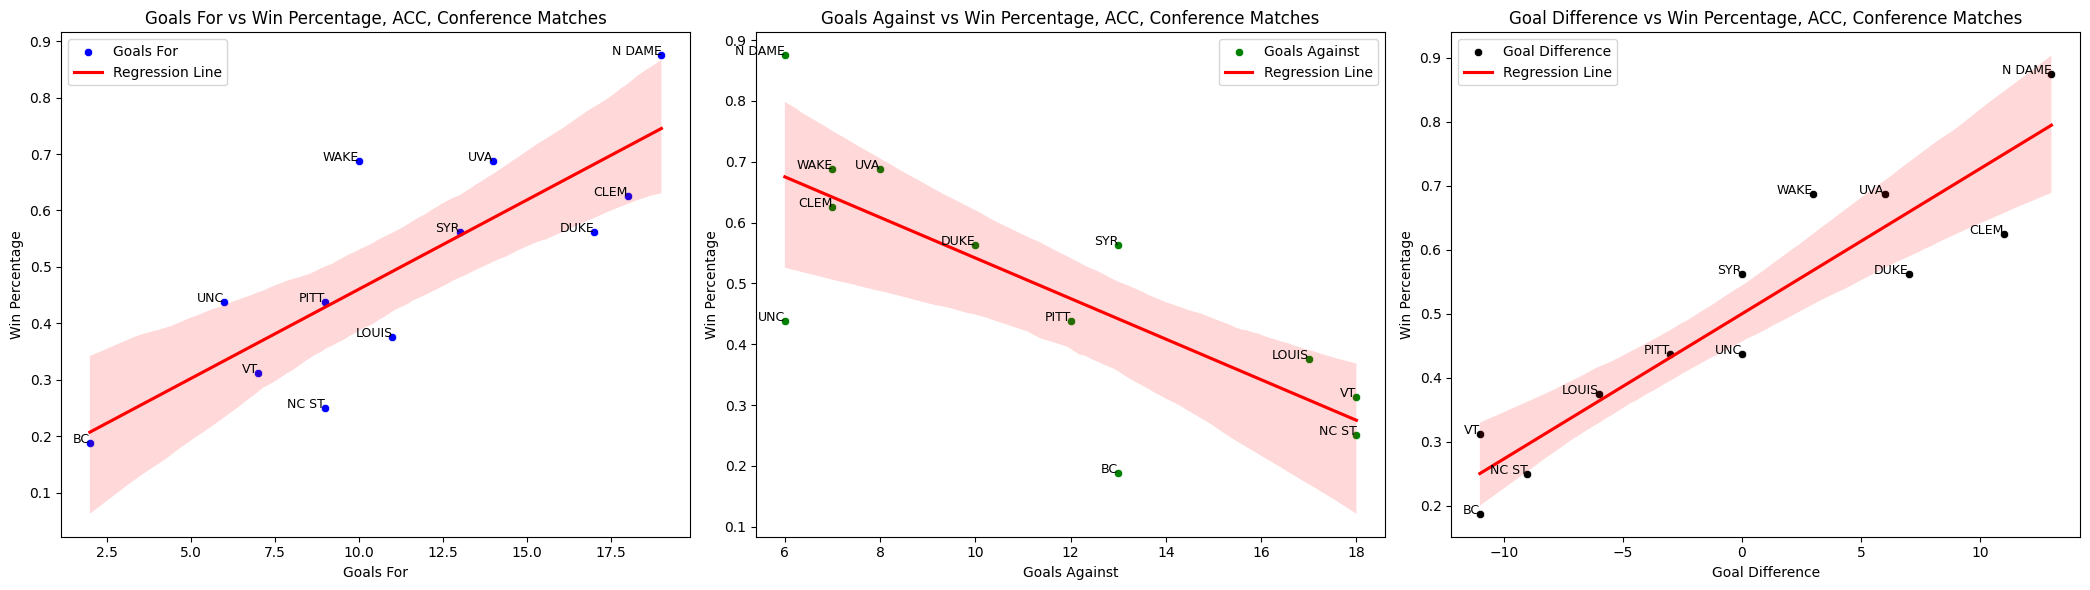

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='GF ~ wpc', data=ACC_F23_conference_Merged).fit()
ga_lm = smf.ols(formula='GA ~ wpc', data=ACC_F23_conference_Merged).fit()
gdf_lm = smf.ols(formula='GD ~ wpc', data=ACC_F23_conference_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='GF', y='wpc', data=ACC_F23_conference_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='GF', y='wpc', data=ACC_F23_conference_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Goals For vs Win Percentage, ACC, Conference Matches')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for i in range(ACC_F23_conference_Merged.shape[0]):
    axes[0].text(ACC_F23_conference_Merged['GF'][i],
                 ACC_F23_conference_Merged['wpc'][i],
                 ACC_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='GA', y='wpc', data=ACC_F23_conference_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='GA', y='wpc', data=ACC_F23_conference_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Goals Against vs Win Percentage, ACC, Conference Matches')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for i in range(ACC_F23_conference_Merged.shape[0]):
    axes[1].text(ACC_F23_conference_Merged['GA'][i],
                 ACC_F23_conference_Merged['wpc'][i],
                 ACC_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='GD', y='wpc', data=ACC_F23_conference_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='GD', y='wpc', data=ACC_F23_conference_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Goal Difference vs Win Percentage, ACC, Conference Matches')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for i in range(ACC_F23_conference_Merged.shape[0]):
    axes[2].text(ACC_F23_conference_Merged['GD'][i],
                 ACC_F23_conference_Merged['wpc'][i],
                 ACC_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()


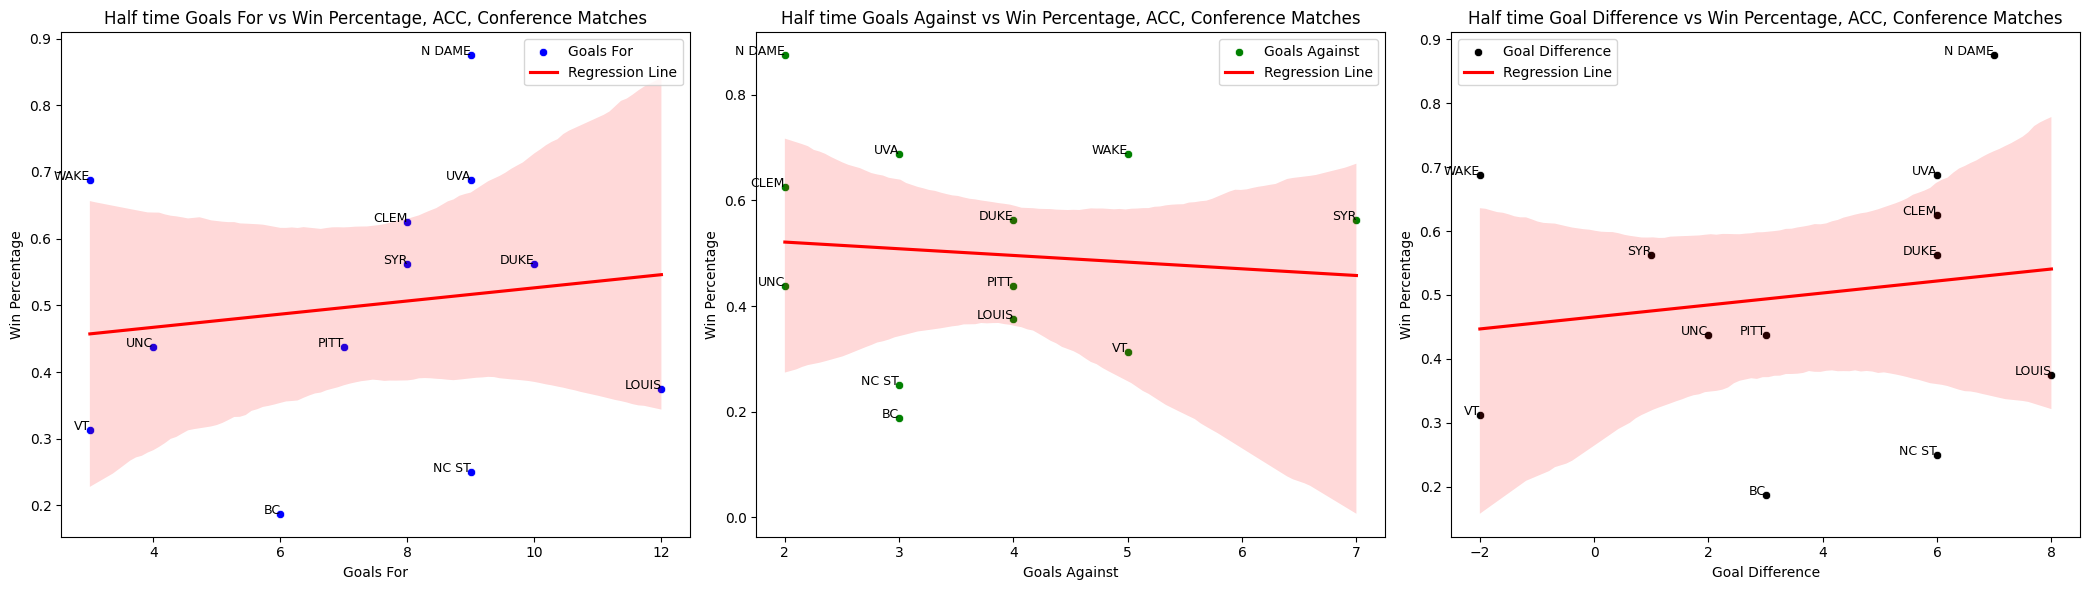

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='HTGF ~ wpc', data=ACC_F23_conference_Merged).fit()
ga_lm = smf.ols(formula='HTGA ~ wpc', data=ACC_F23_conference_Merged).fit()
gdf_lm = smf.ols(formula='HTGD ~ wpc', data=ACC_F23_conference_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='HTGF', y='wpc', data=ACC_F23_conference_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='HTGF', y='wpc', data=ACC_F23_conference_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Half time Goals For vs Win Percentage, ACC, Conference Matches')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for i in range(ACC_F23_conference_Merged.shape[0]):
    axes[0].text(ACC_F23_conference_Merged['HTGF'][i],
                 ACC_F23_conference_Merged['wpc'][i],
                 ACC_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='HTGA', y='wpc', data=ACC_F23_conference_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='HTGA', y='wpc', data=ACC_F23_conference_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Half time Goals Against vs Win Percentage, ACC, Conference Matches')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for i in range(ACC_F23_conference_Merged.shape[0]):
    axes[1].text(ACC_F23_conference_Merged['HTGA'][i],
                 ACC_F23_conference_Merged['wpc'][i],
                 ACC_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='HTGD', y='wpc', data=ACC_F23_conference_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='HTGD', y='wpc', data=ACC_F23_conference_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Half time Goal Difference vs Win Percentage, ACC, Conference Matches')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for i in range(ACC_F23_conference_Merged.shape[0]):
    axes[2].text(ACC_F23_conference_Merged['HTGD'][i],
                 ACC_F23_conference_Merged['wpc'][i],
                 ACC_F23_conference_Merged['Teams'][i],
                 fontsize=9, ha='right')

axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()


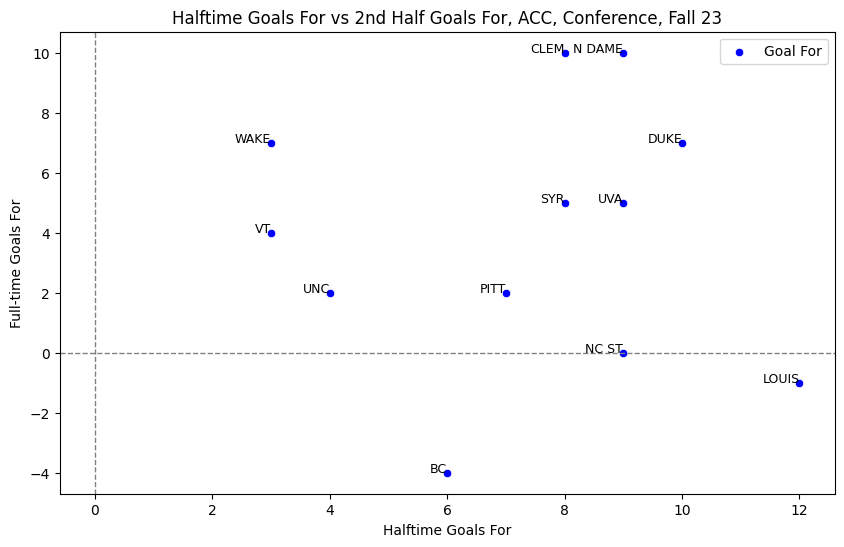

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGF', y='2GF', data=ACC_F23_conference_Merged, color='blue', label='Goal For')
# sns.regplot(x='HTGF', y='2GF', data=ACC_F23_conference_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for i in range(ACC_F23_conference_Merged.shape[0]):
    plt.text(ACC_F23_conference_Merged['HTGF'][i],
             ACC_F23_conference_Merged['2GF'][i],
             ACC_F23_conference_Merged['Teams'][i],
             fontsize=9, ha='right')
plt.title('Halftime Goals For vs 2nd Half Goals For, ACC, Conference, Fall 23')
plt.xlabel('Halftime Goals For')
plt.ylabel('Full-time Goals For')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

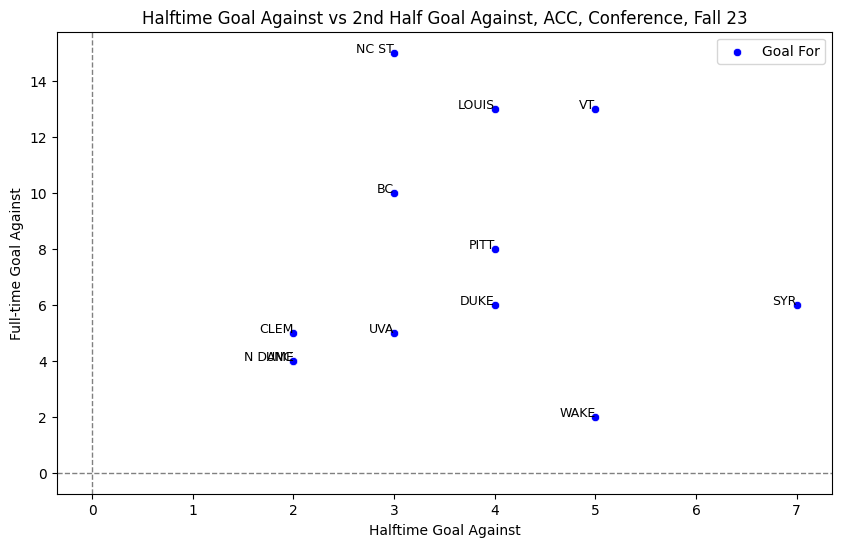

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGA', y='2GA', data=ACC_F23_conference_Merged, color='blue', label='Goal For')
# sns.regplot(x='HTGA', y='2GA', data=ACC_F23_conference_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for i in range(ACC_F23_conference_Merged.shape[0]):
    plt.text(ACC_F23_conference_Merged['HTGA'][i],
             ACC_F23_conference_Merged['2GA'][i],
             ACC_F23_conference_Merged['Teams'][i],
             fontsize=9, ha='right')
plt.title('Halftime Goal Against vs 2nd Half Goal Against, ACC, Conference, Fall 23')
plt.xlabel('Halftime Goal Against')
plt.ylabel('Full-time Goal Against')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

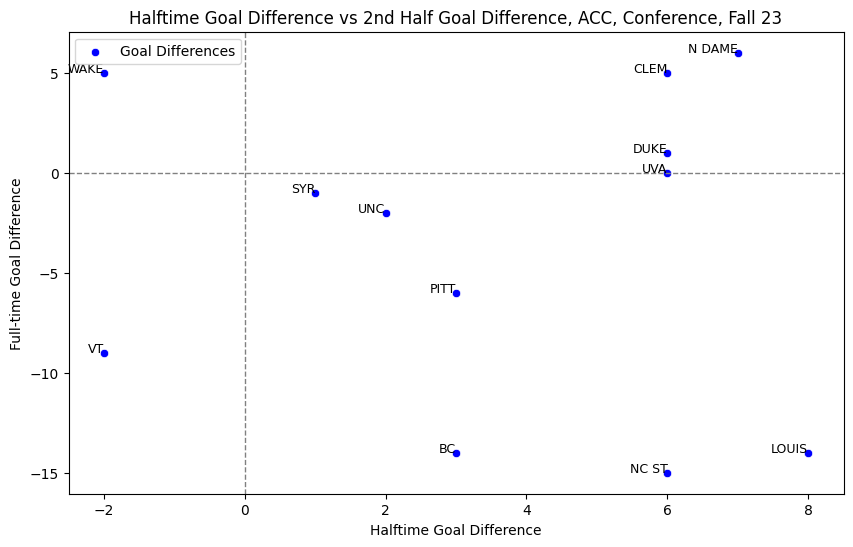

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='2GD', data=ACC_F23_conference_Merged, color='blue', label='Goal Differences')
# sns.regplot(x='HTGD', y='2GD', data=ACC_F23_conference_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for i in range(ACC_F23_conference_Merged.shape[0]):
    plt.text(ACC_F23_conference_Merged['HTGD'][i],
             ACC_F23_conference_Merged['2GD'][i],
             ACC_F23_conference_Merged['Teams'][i],
             fontsize=9, ha='right')
plt.title('Halftime Goal Difference vs 2nd Half Goal Difference, ACC, Conference, Fall 23')
plt.xlabel('Halftime Goal Difference')
plt.ylabel('Full-time Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [ ]:
ACC_F23_conference_Merged['2GFRatio'] = ACC_F23_conference_Merged['2GF'] / ACC_F23_conference_Merged['HTGF']
ACC_F23_conference_Merged['2GARatio'] = ACC_F23_conference_Merged['2GA'] / ACC_F23_conference_Merged['HTGA']
ACC_F23_conference_Merged['1GFRatio'] = ACC_F23_conference_Merged['HTGF'] / ACC_F23_conference_Merged['2GF']
ACC_F23_conference_Merged['1GARatio'] = ACC_F23_conference_Merged['HTGA'] / ACC_F23_conference_Merged['2GA']
ACC_F23_conference_Merged['GF/GARatio'] = ACC_F23_conference_Merged['GF'] / ACC_F23_conference_Merged['GA']
ACC_F23_conference_Merged

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,BC,4,0.0,1,5,0,10,4,1.5,1,2,2,3,1.5,8,2,13,3,6,3,-11,-4,10,-14,-17,0.0,37.5,0.1875,0.023121,0.800000,0.137931,-0.662069,-0.666667,3.333333,-1.500000,0.300000,0.153846
1,CLEM,4,1.0,2,2,4,6,4,4.0,6,0,14,1,5.0,8,18,7,2,8,6,11,10,5,5,-1,25.0,100.0,0.6250,0.868633,0.941176,0.800000,-0.141176,1.250000,2.500000,0.800000,0.400000,2.571429
2,DUKE,4,0.5,1,4,1,5,4,4.0,6,3,16,5,4.5,8,17,10,4,10,6,7,7,6,1,-5,12.5,100.0,0.5625,0.742931,0.862069,0.576471,-0.285598,0.700000,1.500000,1.428571,0.666667,1.700000
3,LOUIS,4,0.5,1,5,2,11,4,2.5,7,3,9,6,3.0,8,11,17,4,12,8,-6,-1,13,-14,-22,12.5,62.5,0.3750,0.295122,0.900000,0.005882,-0.894118,-0.083333,3.250000,-12.000000,0.307692,0.647059
4,N DAME,4,3.0,0,2,6,3,4,4.0,7,2,13,3,7.0,8,19,6,2,9,7,13,10,4,6,-1,75.0,100.0,0.8750,0.909320,0.952941,0.862069,-0.090872,1.111111,2.000000,0.900000,0.500000,3.166667
5,NC ST,4,0.5,1,7,5,11,4,1.5,2,2,4,7,2.0,8,9,18,3,9,6,-9,0,15,-15,-21,12.5,37.5,0.2500,0.200000,0.900000,0.000000,-0.900000,0.000000,5.000000,inf,0.200000,0.500000
6,PITT,4,0.5,3,6,3,11,4,3.0,1,1,6,1,3.5,8,9,12,4,7,3,-3,2,8,-6,-9,12.5,75.0,0.4375,0.360000,0.753846,0.058824,-0.695023,0.285714,2.000000,3.500000,0.500000,0.750000
7,SYR,4,2.0,4,4,6,7,4,2.5,4,3,7,6,4.5,8,13,13,7,8,1,0,5,6,-1,-2,50.0,62.5,0.5625,0.500000,0.566372,0.409836,-0.156536,0.625000,0.857143,1.600000,1.166667,1.000000
8,UNC,4,1.0,0,0,1,3,4,2.5,4,2,5,3,3.5,8,6,6,2,4,2,0,2,4,-2,-4,25.0,62.5,0.4375,0.500000,0.800000,0.200000,-0.600000,0.500000,2.000000,2.000000,0.500000,1.000000
9,UVA,4,1.5,2,3,5,6,4,4.0,6,1,9,2,5.5,8,14,8,3,9,6,6,5,5,0,-6,37.5,100.0,0.6875,0.753846,0.900000,0.500000,-0.400000,0.555556,1.666667,1.800000,0.600000,1.750000


<ipython-input-16-3b4fdda472c8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GFRatio', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Blues_d')


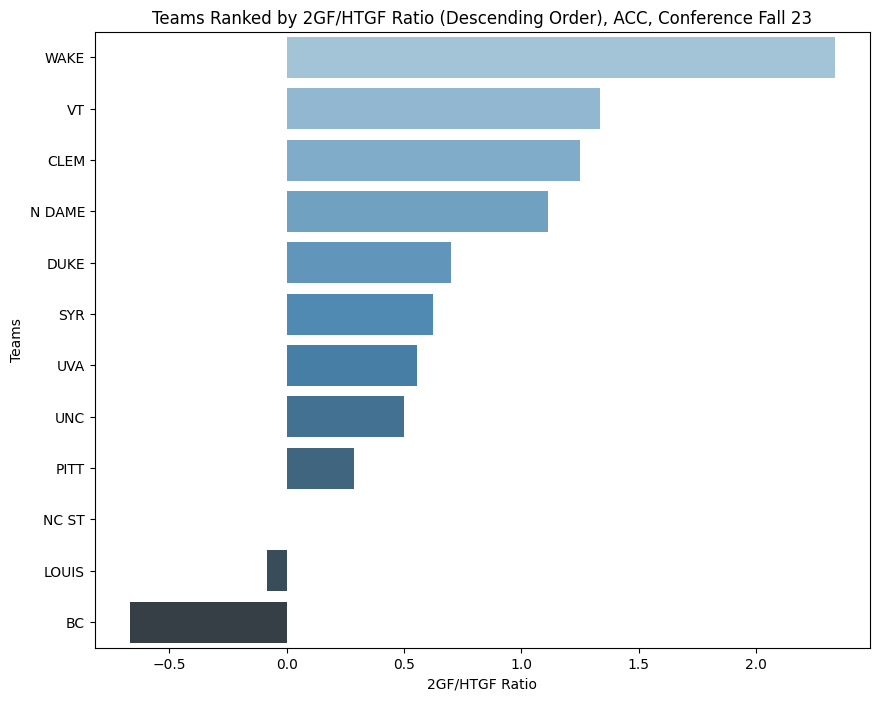

In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_conference_Merged.dropna(subset=['2GFRatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_conference_Merged_sorted = ACC_F23_conference_Merged.sort_values('2GFRatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GFRatio', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by 2GF/HTGF Ratio (Descending Order), ACC, Conference Fall 23')
plt.xlabel('2GF/HTGF Ratio')
plt.ylabel('Teams')
plt.show()

<ipython-input-17-1b5d4042b151>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GARatio', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Reds_d')


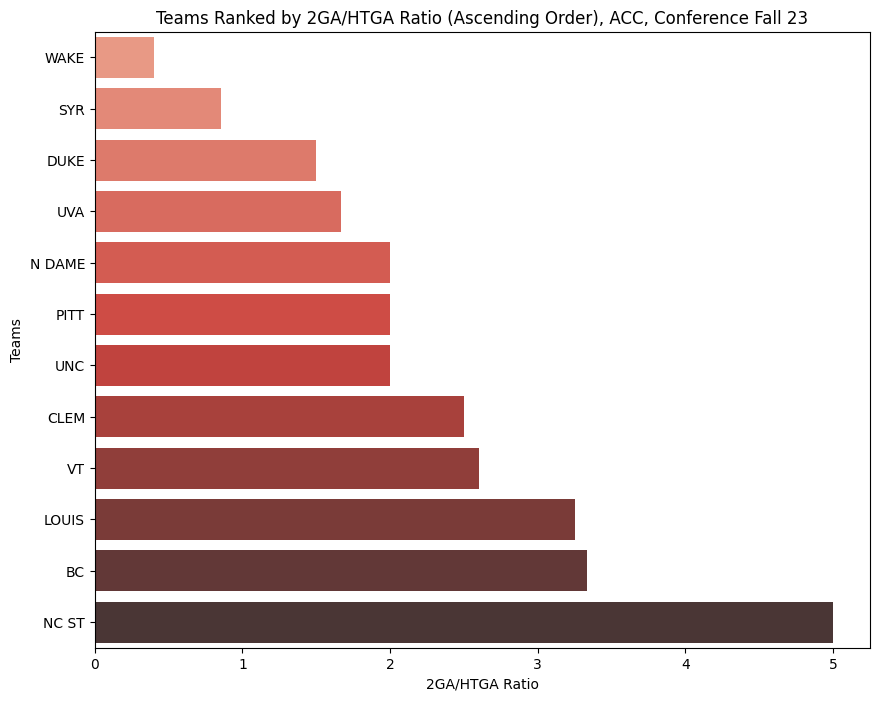

In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_conference_Merged.dropna(subset=['2GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_conference_Merged_sorted = ACC_F23_conference_Merged.sort_values('2GARatio', ascending = True)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GARatio', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Reds_d')

plt.title('Teams Ranked by 2GA/HTGA Ratio (Ascending Order), ACC, Conference Fall 23')
plt.xlabel('2GA/HTGA Ratio')
plt.ylabel('Teams')
plt.show()

<ipython-input-18-4b5b93170843>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GF/GARatio', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Blues_d')


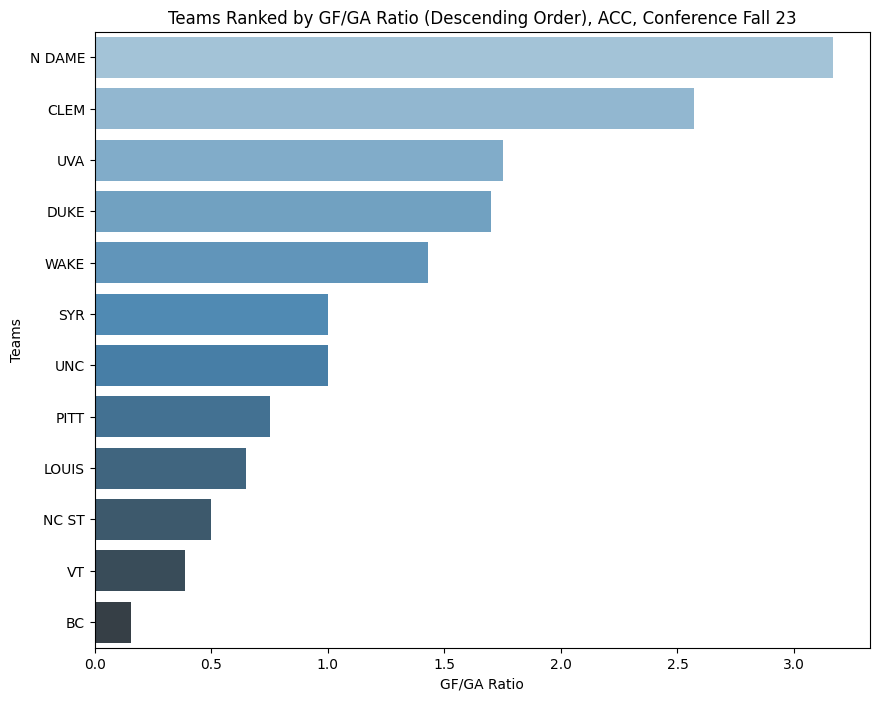

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,BC,4,0.0,1,5,0,10,4,1.5,1,2,2,3,1.5,8,2,13,3,6,3,-11,-4,10,-14,-17,0.0,37.5,0.1875,0.023121,0.800000,0.137931,-0.662069,-0.666667,3.333333,-1.5,0.300000,0.153846
1,CLEM,4,1.0,2,2,4,6,4,4.0,6,0,14,1,5.0,8,18,7,2,8,6,11,10,5,5,-1,25.0,100.0,0.6250,0.868633,0.941176,0.800000,-0.141176,1.250000,2.500000,0.8,0.400000,2.571429
2,DUKE,4,0.5,1,4,1,5,4,4.0,6,3,16,5,4.5,8,17,10,4,10,6,7,7,6,1,-5,12.5,100.0,0.5625,0.742931,0.862069,0.576471,-0.285598,0.700000,1.500000,1.428571,0.666667,1.700000
3,LOUIS,4,0.5,1,5,2,11,4,2.5,7,3,9,6,3.0,8,11,17,4,12,8,-6,-1,13,-14,-22,12.5,62.5,0.3750,0.295122,0.900000,0.005882,-0.894118,-0.083333,3.250000,-12.0,0.307692,0.647059
4,N DAME,4,3.0,0,2,6,3,4,4.0,7,2,13,3,7.0,8,19,6,2,9,7,13,10,4,6,-1,75.0,100.0,0.8750,0.909320,0.952941,0.862069,-0.090872,1.111111,2.000000,0.9,0.500000,3.166667
5,NC ST,4,0.5,1,7,5,11,4,1.5,2,2,4,7,2.0,8,9,18,3,9,6,-9,0,15,-15,-21,12.5,37.5,0.2500,0.200000,0.900000,0.000000,-0.900000,0.000000,5.000000,<NA>,0.200000,0.500000
6,PITT,4,0.5,3,6,3,11,4,3.0,1,1,6,1,3.5,8,9,12,4,7,3,-3,2,8,-6,-9,12.5,75.0,0.4375,0.360000,0.753846,0.058824,-0.695023,0.285714,2.000000,3.5,0.500000,0.750000
7,SYR,4,2.0,4,4,6,7,4,2.5,4,3,7,6,4.5,8,13,13,7,8,1,0,5,6,-1,-2,50.0,62.5,0.5625,0.500000,0.566372,0.409836,-0.156536,0.625000,0.857143,1.6,1.166667,1.000000
8,UNC,4,1.0,0,0,1,3,4,2.5,4,2,5,3,3.5,8,6,6,2,4,2,0,2,4,-2,-4,25.0,62.5,0.4375,0.500000,0.800000,0.200000,-0.600000,0.500000,2.000000,2.0,0.500000,1.000000
9,UVA,4,1.5,2,3,5,6,4,4.0,6,1,9,2,5.5,8,14,8,3,9,6,6,5,5,0,-6,37.5,100.0,0.6875,0.753846,0.900000,0.500000,-0.400000,0.555556,1.666667,1.8,0.600000,1.750000


In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_conference_Merged.dropna(subset=['GF/GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_conference_Merged_sorted = ACC_F23_conference_Merged.sort_values('GF/GARatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='GF/GARatio', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by GF/GA Ratio (Descending Order), ACC, Conference Fall 23')
plt.xlabel('GF/GA Ratio')
plt.ylabel('Teams')
plt.show()

ACC_F23_conference_Merged

<ipython-input-57-91633e770daf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hwpc', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Blues_d')


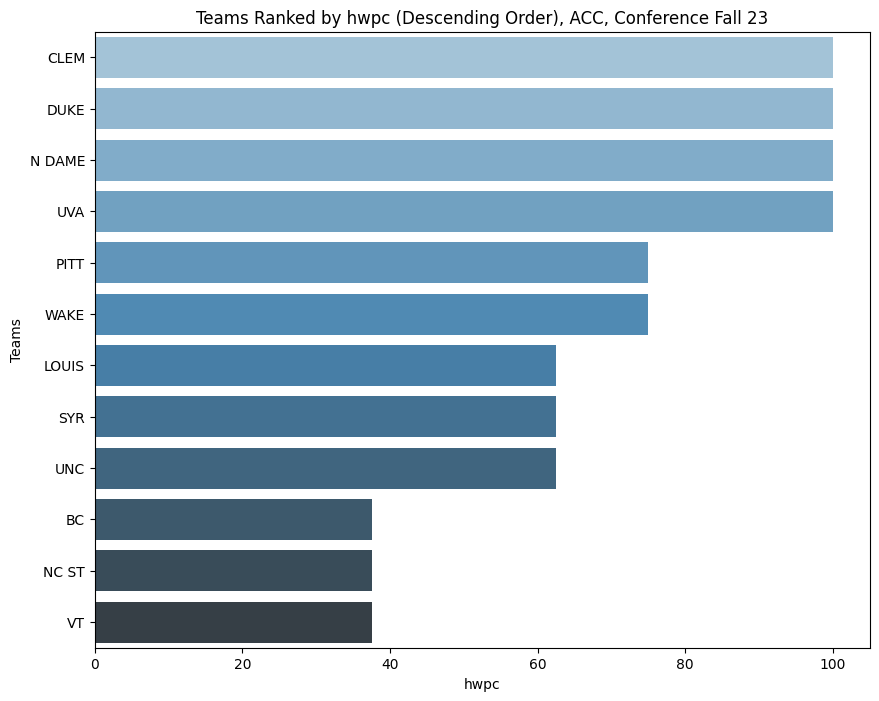

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,BC,4,0.0,1,5,0,10,4,1.5,1,2,2,3,1.5,8,2,13,3,6,3,-11,-4,10,-14,-17,0.0,37.5,0.000000,0.1875,0.023121,0.800000,0.137931,-0.662069
1,CLEM,4,1.0,2,2,4,6,4,4.0,6,0,14,1,5.0,8,18,7,2,8,6,11,10,5,5,-1,25.0,100.0,0.250000,0.6250,0.868633,0.941176,0.800000,-0.141176
2,DUKE,4,0.5,1,4,1,5,4,4.0,6,3,16,5,4.5,8,17,10,4,10,6,7,7,6,1,-5,12.5,100.0,0.125000,0.5625,0.742931,0.862069,0.576471,-0.285598
3,LOUIS,4,0.5,1,5,2,11,4,2.5,7,3,9,6,3.0,8,11,17,4,12,8,-6,-1,13,-14,-22,12.5,62.5,0.200000,0.3750,0.295122,0.900000,0.005882,-0.894118
4,N DAME,4,3.0,0,2,6,3,4,4.0,7,2,13,3,7.0,8,19,6,2,9,7,13,10,4,6,-1,75.0,100.0,0.750000,0.8750,0.909320,0.952941,0.862069,-0.090872
5,NC ST,4,0.5,1,7,5,11,4,1.5,2,2,4,7,2.0,8,9,18,3,9,6,-9,0,15,-15,-21,12.5,37.5,0.333333,0.2500,0.200000,0.900000,0.000000,-0.900000
6,PITT,4,0.5,3,6,3,11,4,3.0,1,1,6,1,3.5,8,9,12,4,7,3,-3,2,8,-6,-9,12.5,75.0,0.166667,0.4375,0.360000,0.753846,0.058824,-0.695023
7,SYR,4,2.0,4,4,6,7,4,2.5,4,3,7,6,4.5,8,13,13,7,8,1,0,5,6,-1,-2,50.0,62.5,0.800000,0.5625,0.500000,0.566372,0.409836,-0.156536
8,UNC,4,1.0,0,0,1,3,4,2.5,4,2,5,3,3.5,8,6,6,2,4,2,0,2,4,-2,-4,25.0,62.5,0.400000,0.4375,0.500000,0.800000,0.200000,-0.600000
9,UVA,4,1.5,2,3,5,6,4,4.0,6,1,9,2,5.5,8,14,8,3,9,6,6,5,5,0,-6,37.5,100.0,0.375000,0.6875,0.753846,0.900000,0.500000,-0.400000


In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_conference_Merged.dropna(subset=['hwpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_conference_Merged_sorted = ACC_F23_conference_Merged.sort_values('hwpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='hwpc', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by hwpc (Descending Order), ACC, Conference Fall 23')
plt.xlabel('hwpc')
plt.ylabel('Teams')
plt.show()

ACC_F23_conference_Merged

<ipython-input-58-08276b7fb462>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awpc', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Blues_d')


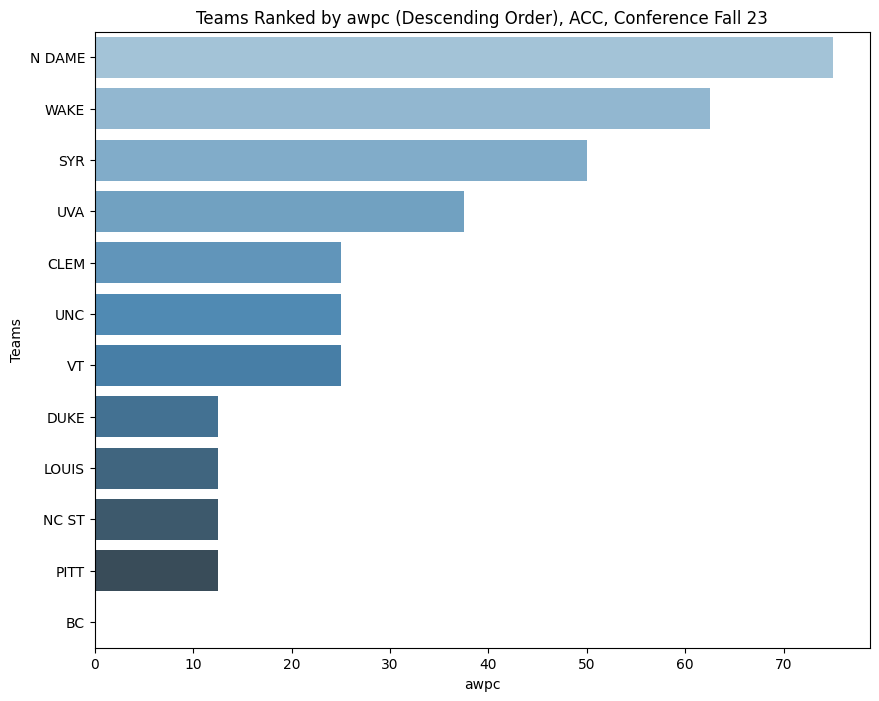

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,BC,4,0.0,1,5,0,10,4,1.5,1,2,2,3,1.5,8,2,13,3,6,3,-11,-4,10,-14,-17,0.0,37.5,0.000000,0.1875,0.023121,0.800000,0.137931,-0.662069
1,CLEM,4,1.0,2,2,4,6,4,4.0,6,0,14,1,5.0,8,18,7,2,8,6,11,10,5,5,-1,25.0,100.0,0.250000,0.6250,0.868633,0.941176,0.800000,-0.141176
2,DUKE,4,0.5,1,4,1,5,4,4.0,6,3,16,5,4.5,8,17,10,4,10,6,7,7,6,1,-5,12.5,100.0,0.125000,0.5625,0.742931,0.862069,0.576471,-0.285598
3,LOUIS,4,0.5,1,5,2,11,4,2.5,7,3,9,6,3.0,8,11,17,4,12,8,-6,-1,13,-14,-22,12.5,62.5,0.200000,0.3750,0.295122,0.900000,0.005882,-0.894118
4,N DAME,4,3.0,0,2,6,3,4,4.0,7,2,13,3,7.0,8,19,6,2,9,7,13,10,4,6,-1,75.0,100.0,0.750000,0.8750,0.909320,0.952941,0.862069,-0.090872
5,NC ST,4,0.5,1,7,5,11,4,1.5,2,2,4,7,2.0,8,9,18,3,9,6,-9,0,15,-15,-21,12.5,37.5,0.333333,0.2500,0.200000,0.900000,0.000000,-0.900000
6,PITT,4,0.5,3,6,3,11,4,3.0,1,1,6,1,3.5,8,9,12,4,7,3,-3,2,8,-6,-9,12.5,75.0,0.166667,0.4375,0.360000,0.753846,0.058824,-0.695023
7,SYR,4,2.0,4,4,6,7,4,2.5,4,3,7,6,4.5,8,13,13,7,8,1,0,5,6,-1,-2,50.0,62.5,0.800000,0.5625,0.500000,0.566372,0.409836,-0.156536
8,UNC,4,1.0,0,0,1,3,4,2.5,4,2,5,3,3.5,8,6,6,2,4,2,0,2,4,-2,-4,25.0,62.5,0.400000,0.4375,0.500000,0.800000,0.200000,-0.600000
9,UVA,4,1.5,2,3,5,6,4,4.0,6,1,9,2,5.5,8,14,8,3,9,6,6,5,5,0,-6,37.5,100.0,0.375000,0.6875,0.753846,0.900000,0.500000,-0.400000


In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_conference_Merged.dropna(subset=['awpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_conference_Merged_sorted = ACC_F23_conference_Merged.sort_values('awpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='awpc', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by awpc (Descending Order), ACC, Conference Fall 23')
plt.xlabel('awpc')
plt.ylabel('Teams')
plt.show()

ACC_F23_conference_Merged

<ipython-input-59-bf85e77b1db6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awpc:hwpc', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Blues_d')


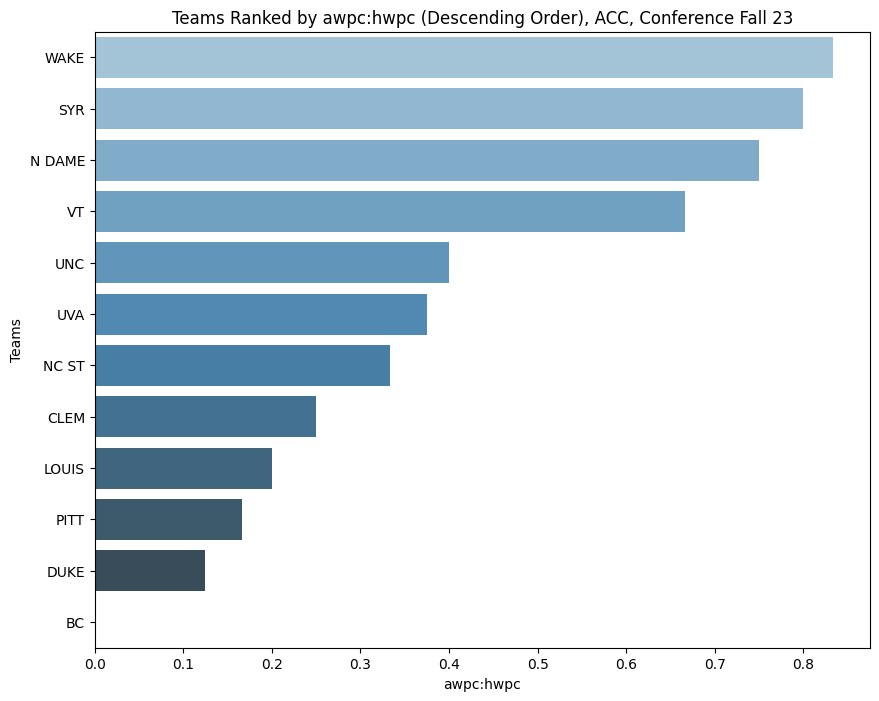

,Teams,Pa,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Ph,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,HTGA,HTGF,HTGD,GD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,BC,4,0.0,1,5,0,10,4,1.5,1,2,2,3,1.5,8,2,13,3,6,3,-11,-4,10,-14,-17,0.0,37.5,0.000000,0.1875,0.023121,0.800000,0.137931,-0.662069
1,CLEM,4,1.0,2,2,4,6,4,4.0,6,0,14,1,5.0,8,18,7,2,8,6,11,10,5,5,-1,25.0,100.0,0.250000,0.6250,0.868633,0.941176,0.800000,-0.141176
2,DUKE,4,0.5,1,4,1,5,4,4.0,6,3,16,5,4.5,8,17,10,4,10,6,7,7,6,1,-5,12.5,100.0,0.125000,0.5625,0.742931,0.862069,0.576471,-0.285598
3,LOUIS,4,0.5,1,5,2,11,4,2.5,7,3,9,6,3.0,8,11,17,4,12,8,-6,-1,13,-14,-22,12.5,62.5,0.200000,0.3750,0.295122,0.900000,0.005882,-0.894118
4,N DAME,4,3.0,0,2,6,3,4,4.0,7,2,13,3,7.0,8,19,6,2,9,7,13,10,4,6,-1,75.0,100.0,0.750000,0.8750,0.909320,0.952941,0.862069,-0.090872
5,NC ST,4,0.5,1,7,5,11,4,1.5,2,2,4,7,2.0,8,9,18,3,9,6,-9,0,15,-15,-21,12.5,37.5,0.333333,0.2500,0.200000,0.900000,0.000000,-0.900000
6,PITT,4,0.5,3,6,3,11,4,3.0,1,1,6,1,3.5,8,9,12,4,7,3,-3,2,8,-6,-9,12.5,75.0,0.166667,0.4375,0.360000,0.753846,0.058824,-0.695023
7,SYR,4,2.0,4,4,6,7,4,2.5,4,3,7,6,4.5,8,13,13,7,8,1,0,5,6,-1,-2,50.0,62.5,0.800000,0.5625,0.500000,0.566372,0.409836,-0.156536
8,UNC,4,1.0,0,0,1,3,4,2.5,4,2,5,3,3.5,8,6,6,2,4,2,0,2,4,-2,-4,25.0,62.5,0.400000,0.4375,0.500000,0.800000,0.200000,-0.600000
9,UVA,4,1.5,2,3,5,6,4,4.0,6,1,9,2,5.5,8,14,8,3,9,6,6,5,5,0,-6,37.5,100.0,0.375000,0.6875,0.753846,0.900000,0.500000,-0.400000


In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_conference_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_conference_Merged.dropna(subset=['awpc:hwpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_conference_Merged_sorted = ACC_F23_conference_Merged.sort_values('awpc:hwpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='awpc:hwpc', y='Teams', data=ACC_F23_conference_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by awpc:hwpc (Descending Order), ACC, Conference Fall 23')
plt.xlabel('awpc:hwpc')
plt.ylabel('Teams')
plt.show()

ACC_F23_conference_Merged

In [9]:
# For ALL matches (conference + non-conference)

ACC_F23_Merged = pd.merge(ACC_F23_Away,ACC_F23_Home, on = ['Teams'])
ACC_F23_Merged['W'] = ACC_F23_Merged['awinvalue'] + ACC_F23_Merged['hwinvalue']
ACC_F23_Merged['G'] = ACC_F23_Merged['Played Home_x'] + ACC_F23_Merged['Played Home_y']
ACC_F23_Merged['GF'] = ACC_F23_Merged['Scored_x'] + ACC_F23_Merged['Scored_y']
ACC_F23_Merged['GA'] = ACC_F23_Merged['Conceded_x'] + ACC_F23_Merged['Conceded_y']
ACC_F23_Merged['GD'] = ACC_F23_Merged['GF'] - ACC_F23_Merged['GA']
ACC_F23_Merged['HTGA'] = ACC_F23_Merged['HTAG_x'] + ACC_F23_Merged['HTAG_y']
ACC_F23_Merged['HTGF'] = ACC_F23_Merged['HTHG_x'] + ACC_F23_Merged['HTHG_y']
ACC_F23_Merged['HTGD'] = ACC_F23_Merged['HTGF'] - ACC_F23_Merged['HTGA']
ACC_F23_Merged['2GF'] = ACC_F23_Merged['GF'] - ACC_F23_Merged['HTGF']
ACC_F23_Merged['2GA'] = ACC_F23_Merged['GA'] - ACC_F23_Merged['HTGA']
ACC_F23_Merged['2GD'] = ACC_F23_Merged['2GF'] - ACC_F23_Merged['2GA']
ACC_F23_Merged['Change_GD'] = ACC_F23_Merged['2GD'] - ACC_F23_Merged['HTGD']
ACC_F23_Merged['awpc'] = ACC_F23_Merged['awinvalue'] / ACC_F23_Merged['Played Home_x']
ACC_F23_Merged['hwpc'] = ACC_F23_Merged['hwinvalue'] / ACC_F23_Merged['Played Home_y']
ACC_F23_Merged['awpc:hwpc'] = ACC_F23_Merged['awpc'] / ACC_F23_Merged['hwpc']
ACC_F23_Merged['wpc'] = ACC_F23_Merged['W']/ACC_F23_Merged['G']
ACC_F23_Merged['pyth'] = ACC_F23_Merged['GF']**2/(ACC_F23_Merged['GF']**2 + ACC_F23_Merged['GA']**2)
ACC_F23_Merged['pyth_ht'] = ACC_F23_Merged['HTGF']**2/(ACC_F23_Merged['HTGF']**2 + ACC_F23_Merged['HTGA']**2)
ACC_F23_Merged['pyth_h2'] = ACC_F23_Merged['2GF']**2/(ACC_F23_Merged['2GF']**2 + ACC_F23_Merged['2GA']**2)
ACC_F23_Merged['pyth_diff'] = ACC_F23_Merged['pyth_h2'] - ACC_F23_Merged['pyth_ht']
ACC_F23_Merged

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,BC,5,0.0,2,7,1,13,11,5.5,7,5,9,8,5.5,16,10,21,-11,7,14,7,-4,14,-18,-25,0.000000,0.500000,0.000000,0.343750,0.184843,0.800000,0.075472,-0.724528
1,CLEM,5,2.0,2,3,7,8,10,8.5,16,2,35,5,10.5,15,42,13,29,4,19,15,23,9,14,-1,0.400000,0.850000,0.470588,0.700000,0.912571,0.957560,0.867213,-0.090347
2,DUKE,5,1.5,1,4,3,5,10,9.5,10,5,40,10,11.0,15,43,15,28,6,14,8,29,9,20,12,0.300000,0.950000,0.315789,0.733333,0.891514,0.844828,0.912148,0.067320
3,ETSU,1,0.0,0,0,0,1,1,0.0,1,0,1,2,0.0,2,1,3,-2,0,1,1,0,3,-3,-4,0.000000,0.000000,NaN,0.000000,0.100000,1.000000,0.000000,-1.000000
4,LOUIS,7,3.5,3,5,10,11,9,7.0,12,4,22,12,10.5,16,32,23,9,7,17,10,15,16,-1,-11,0.500000,0.777778,0.642857,0.656250,0.659369,0.855030,0.467775,-0.387254
5,MD,1,0.0,1,2,1,2,1,0.5,0,0,0,0,0.5,2,1,2,-1,1,2,1,-1,1,-2,-3,0.000000,0.500000,0.000000,0.250000,0.200000,0.800000,0.500000,-0.300000
6,N DAME,6,4.5,1,2,9,3,10,8.5,15,4,27,5,13.0,16,36,8,28,5,17,12,19,3,16,4,0.750000,0.850000,0.882353,0.812500,0.952941,0.920382,0.975676,0.055294
7,NC ST,6,0.5,2,7,6,16,11,7.0,8,4,18,12,7.5,17,24,28,-4,6,15,9,9,22,-13,-22,0.083333,0.636364,0.130952,0.441176,0.423529,0.862069,0.143363,-0.718706
8,PENNST,1,0.5,1,0,1,1,1,0.5,0,0,1,1,1.0,2,2,2,0,1,0,-1,2,1,1,2,0.500000,0.500000,1.000000,0.500000,0.500000,0.000000,0.800000,0.800000
9,PITT,5,0.5,3,8,4,15,10,7.5,9,5,23,7,8.0,15,27,22,5,8,17,9,10,14,-4,-13,0.100000,0.750000,0.133333,0.533333,0.600989,0.818697,0.337838,-0.480859


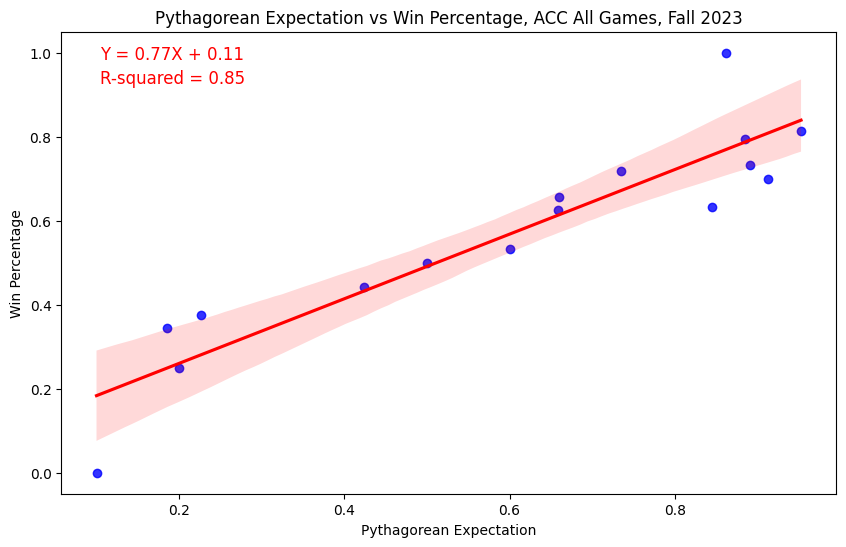

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Sample data
# Replace this with your actual DataFrame
# AAC_F23_conference_Merged = ...

# Plot the scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x="pyth", y="wpc", data=ACC_F23_Merged, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# Calculate the regression line using numpy's polyfit
slope, intercept = np.polyfit(ACC_F23_Merged['pyth'], ACC_F23_Merged['wpc'], 1)

# Calculate R-squared value
X = sm.add_constant(ACC_F23_Merged['pyth'])  # Add constant for intercept
model = sm.OLS(ACC_F23_Merged['wpc'], X).fit()
r_squared = model.rsquared

# Annotate the plot with the regression equation and R-squared value
plt.text(0.05, 0.95, f'Y = {slope:.2f}X + {intercept:.2f}', fontsize=12, ha='left', va='center', transform=plt.gca().transAxes, color='red')
plt.text(0.05, 0.90, f'R-squared = {r_squared:.2f}', fontsize=12, ha='left', va='center', transform=plt.gca().transAxes, color='red')

plt.title('Pythagorean Expectation vs Win Percentage, ACC All Games, Fall 2023')
plt.xlabel('Pythagorean Expectation')
plt.ylabel('Win Percentage')
plt.show()


In [ ]:
# List of teams to drop
teams_to_drop = ['UCF','PENNST','MD','ETSU']  # Replace these with the actual team names you want to drop

# Drop the specified teams
ACC_F23_Merged = ACC_F23_Merged[~ACC_F23_Merged['Teams'].isin(teams_to_drop)]

# Display the updated DataFrame
ACC_F23_Merged

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
0,BC,5,0.0,2,7,1,13,11,5.5,7,5,9,8,5.5,16,10,21,-11,7,14,7,-4,14,-18,-25,0.000000,0.500000,0.000000,0.343750,0.184843,0.800000,0.075472,-0.724528
1,CLEM,5,2.0,2,3,7,8,10,8.5,16,2,35,5,10.5,15,42,13,29,4,19,15,23,9,14,-1,0.400000,0.850000,0.470588,0.700000,0.912571,0.957560,0.867213,-0.090347
2,DUKE,5,1.5,1,4,3,5,10,9.5,10,5,40,10,11.0,15,43,15,28,6,14,8,29,9,20,12,0.300000,0.950000,0.315789,0.733333,0.891514,0.844828,0.912148,0.067320
4,LOUIS,7,3.5,3,5,10,11,9,7.0,12,4,22,12,10.5,16,32,23,9,7,17,10,15,16,-1,-11,0.500000,0.777778,0.642857,0.656250,0.659369,0.855030,0.467775,-0.387254
6,N DAME,6,4.5,1,2,9,3,10,8.5,15,4,27,5,13.0,16,36,8,28,5,17,12,19,3,16,4,0.750000,0.850000,0.882353,0.812500,0.952941,0.920382,0.975676,0.055294
7,NC ST,6,0.5,2,7,6,16,11,7.0,8,4,18,12,7.5,17,24,28,-4,6,15,9,9,22,-13,-22,0.083333,0.636364,0.130952,0.441176,0.423529,0.862069,0.143363,-0.718706
9,PITT,5,0.5,3,8,4,15,10,7.5,9,5,23,7,8.0,15,27,22,5,8,17,9,10,14,-4,-13,0.100000,0.750000,0.133333,0.533333,0.600989,0.818697,0.337838,-0.480859
10,SYR,6,2.5,5,4,8,10,10,7.5,10,4,17,8,10.0,16,25,18,7,9,14,5,11,9,2,-3,0.416667,0.750000,0.555556,0.625000,0.658588,0.707581,0.599010,-0.108571
12,UNC,6,3.0,0,1,7,5,9,6.5,8,3,14,4,9.5,15,21,9,12,3,9,6,12,6,6,0,0.500000,0.722222,0.692308,0.633333,0.844828,0.900000,0.800000,-0.100000
13,UVA,5,2.0,3,3,6,7,11,9.5,11,5,19,8,11.5,16,25,15,10,8,14,6,11,7,4,-2,0.400000,0.863636,0.463158,0.718750,0.735294,0.753846,0.711765,-0.042081


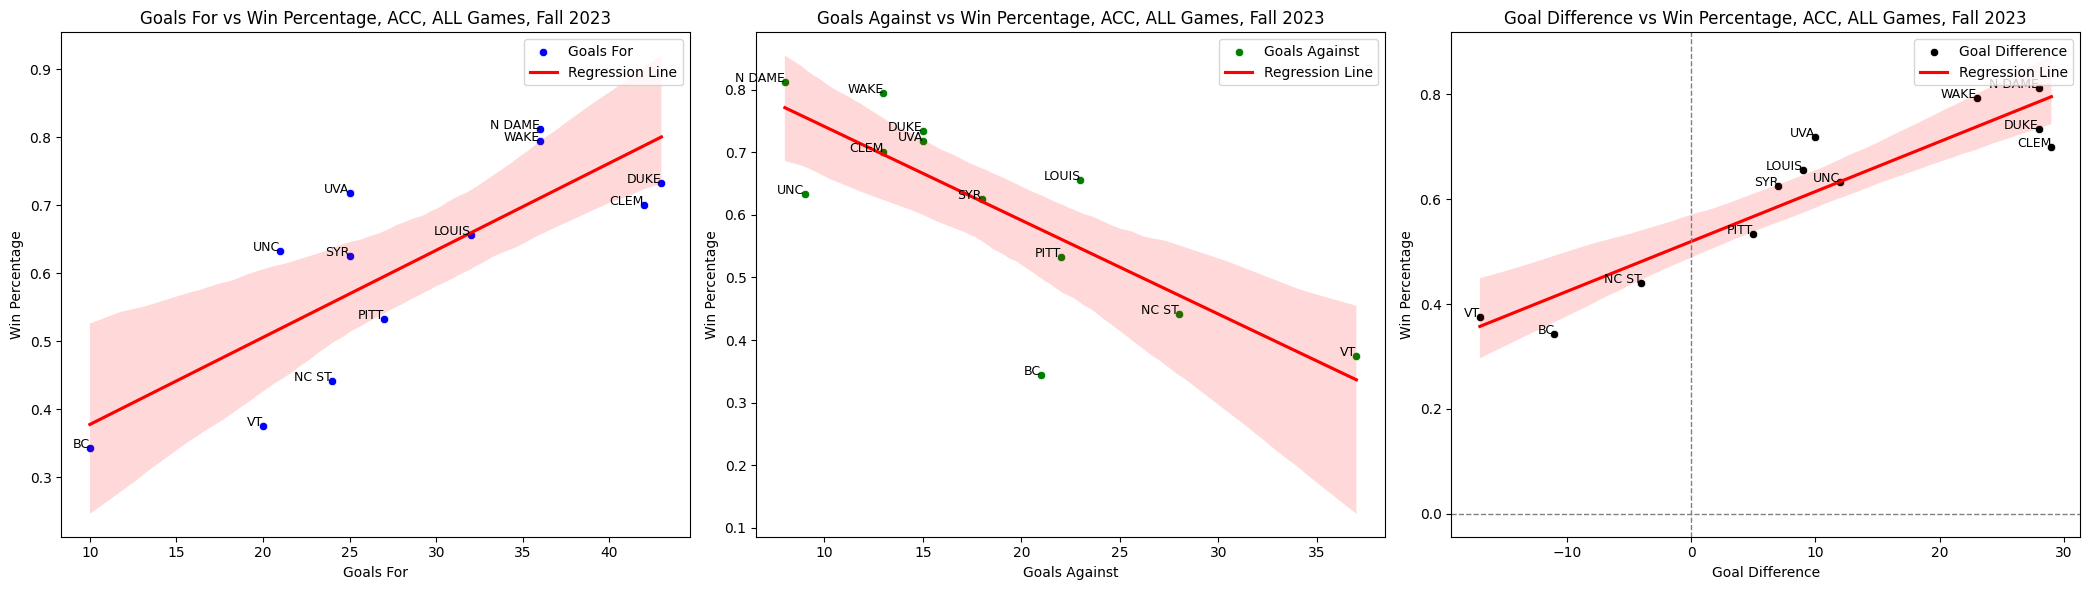

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='GF ~ wpc', data=ACC_F23_Merged).fit()
ga_lm = smf.ols(formula='GA ~ wpc', data=ACC_F23_Merged).fit()
gdf_lm = smf.ols(formula='GD ~ wpc', data=ACC_F23_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='GF', y='wpc', data=ACC_F23_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='GF', y='wpc', data=ACC_F23_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Goals For vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for index, row in ACC_F23_Merged.iterrows():
    axes[0].text(row['GF'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='GA', y='wpc', data=ACC_F23_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='GA', y='wpc', data=ACC_F23_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Goals Against vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for index, row in ACC_F23_Merged.iterrows():
    axes[1].text(row['GA'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')


axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='GD', y='wpc', data=ACC_F23_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='GD', y='wpc', data=ACC_F23_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Goal Difference vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for index, row in ACC_F23_Merged.iterrows():
    axes[2].text(row['GD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[2].legend()
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Show the plots
plt.tight_layout()
plt.show()


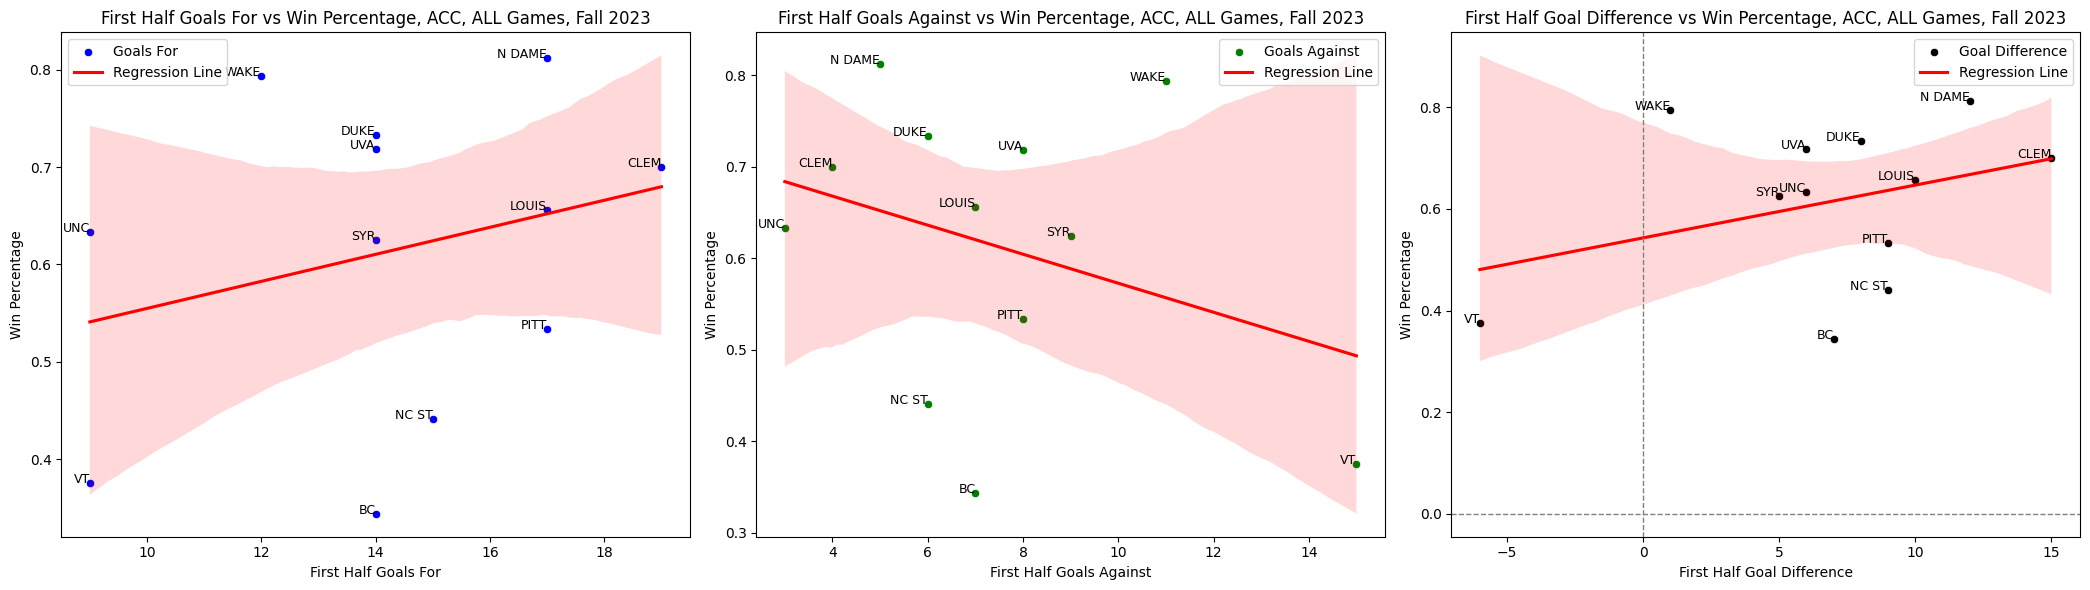

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='HTGF ~ wpc', data=ACC_F23_Merged).fit()
ga_lm = smf.ols(formula='HTGA ~ wpc', data=ACC_F23_Merged).fit()
gdf_lm = smf.ols(formula='HTGD ~ wpc', data=ACC_F23_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='HTGF', y='wpc', data=ACC_F23_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='HTGF', y='wpc', data=ACC_F23_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('First Half Goals For vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[0].set_xlabel('First Half Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for index, row in ACC_F23_Merged.iterrows():
    axes[0].text(row['HTGF'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='HTGA', y='wpc', data=ACC_F23_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='HTGA', y='wpc', data=ACC_F23_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('First Half Goals Against vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[1].set_xlabel('First Half Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for index, row in ACC_F23_Merged.iterrows():
    axes[1].text(row['HTGA'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')


axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='HTGD', y='wpc', data=ACC_F23_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='HTGD', y='wpc', data=ACC_F23_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('First Half Goal Difference vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[2].set_xlabel('First Half Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for index, row in ACC_F23_Merged.iterrows():
    axes[2].text(row['HTGD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[2].legend()
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Show the plots
plt.tight_layout()
plt.show()


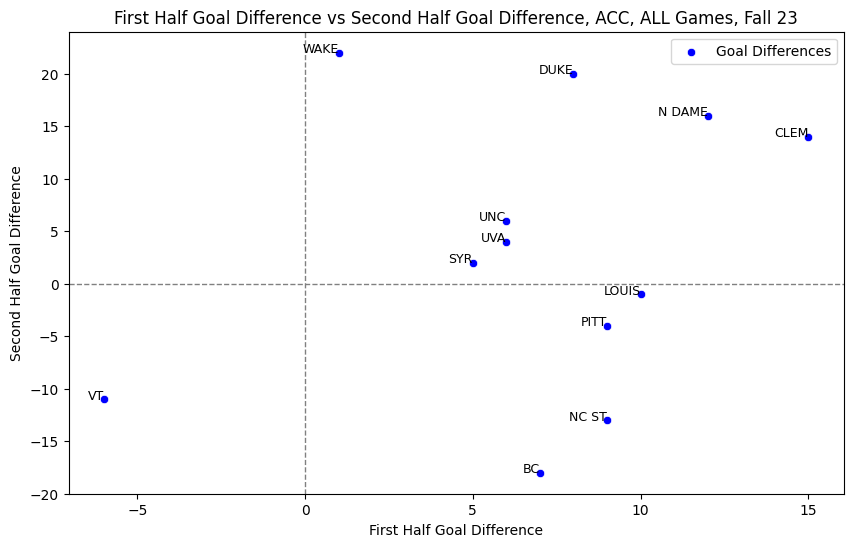

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='2GD', data=ACC_F23_Merged, color='blue', label='Goal Differences')
# sns.regplot(x='HTGD', y='2GD', data=ACC_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in ACC_F23_Merged.iterrows():
    plt.text(row['HTGD'],
                 row['2GD'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('First Half Goal Difference vs Second Half Goal Difference, ACC, ALL Games, Fall 23')
plt.xlabel('First Half Goal Difference')
plt.ylabel('Second Half Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

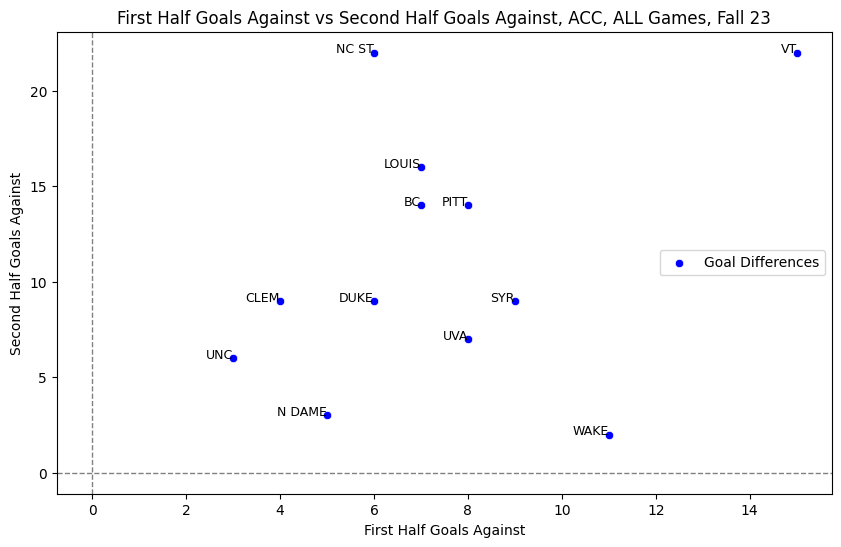

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGA', y='2GA', data=ACC_F23_Merged, color='blue', label='Goal Differences')
# sns.regplot(x='HTGD', y='2GD', data=ACC_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in ACC_F23_Merged.iterrows():
    plt.text(row['HTGA'],
                 row['2GA'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('First Half Goals Against vs Second Half Goals Against, ACC, ALL Games, Fall 23')
plt.xlabel('First Half Goals Against')
plt.ylabel('Second Half Goals Against')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

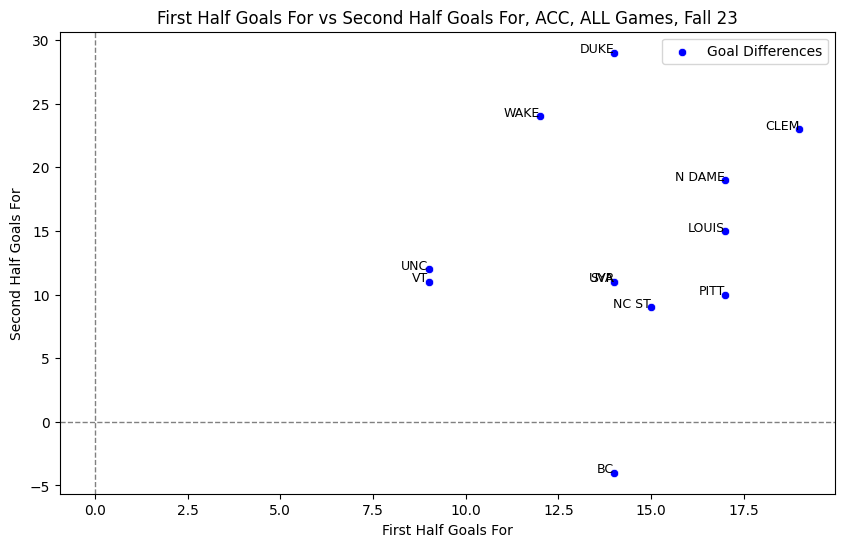

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGF', y='2GF', data=ACC_F23_Merged, color='blue', label='Goal Differences')
# sns.regplot(x='HTGF', y='2GF', data=ACC_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in ACC_F23_Merged.iterrows():
    plt.text(row['HTGF'],
                 row['2GF'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('First Half Goals For vs Second Half Goals For, ACC, ALL Games, Fall 23')
plt.xlabel('First Half Goals For')
plt.ylabel('Second Half Goals For')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

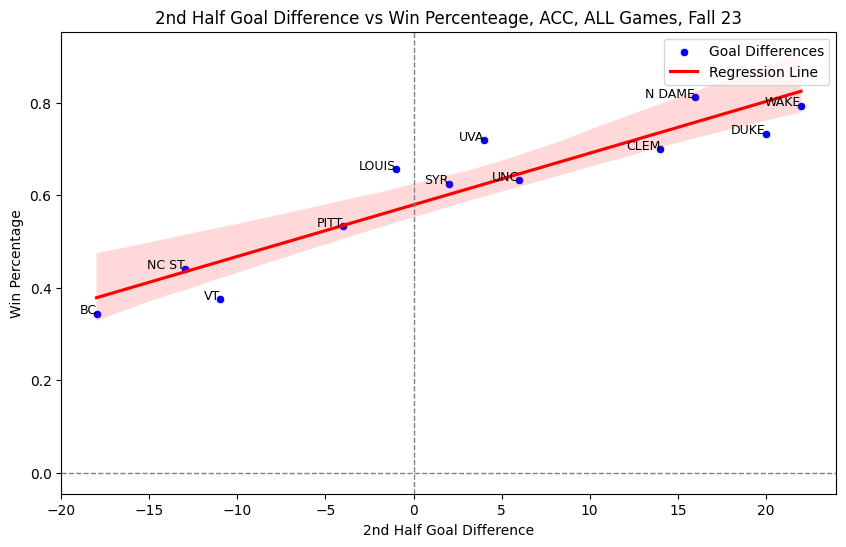

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2GD', y='wpc', data=ACC_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='2GD', y='wpc', data=ACC_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in ACC_F23_Merged.iterrows():
    plt.text(row['2GD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('2nd Half Goal Difference vs Win Percenteage, ACC, ALL Games, Fall 23')
plt.xlabel('2nd Half Goal Difference')
plt.ylabel('Win Percentage')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

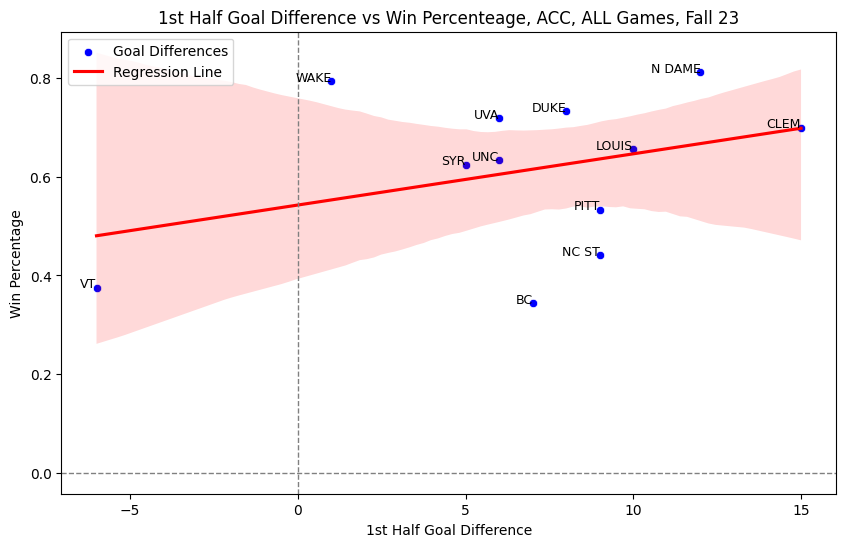

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='wpc', data=ACC_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='HTGD', y='wpc', data=ACC_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in ACC_F23_Merged.iterrows():
    plt.text(row['HTGD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('1st Half Goal Difference vs Win Percenteage, ACC, ALL Games, Fall 23')
plt.xlabel('1st Half Goal Difference')
plt.ylabel('Win Percentage')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [ ]:
# Change in Goal Difference
ACC_F23_Merged['Change_GD'] = ACC_F23_Merged['2GD'] - ACC_F23_Merged['HTGD']
print(ACC_F23_Merged[['HTGD', '2GD', 'Change_GD']].describe())

            HTGD        2GD  Change_GD
count  12.000000  12.000000  12.000000
mean    6.833333   3.083333  -3.750000
std     5.373899  13.173378  13.039276
min    -6.000000 -18.000000 -25.000000
25%     5.750000  -5.750000 -11.500000
50%     7.500000   3.000000  -2.500000
75%     9.250000  14.500000   1.000000
max    15.000000  22.000000  21.000000


<ipython-input-26-afe54605e59e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged['Change_GD'] = ACC_F23_Merged['2GD'] - ACC_F23_Merged['HTGD']


In [ ]:
print('ACC Correlation Matrices:')
# Calculate the correlation matrix
correlation_matrix = ACC_F23_Merged[['HTGD', 'GD']].corr()
print("correlation matrix HTGD vs GD: " )
print(correlation_matrix)
# Calculate the correlation matrix
correlation_matrix = ACC_F23_Merged[['GF', 'wpc']].corr()
print("correlation matrix GF vs wpc: " )
print(correlation_matrix)
# Calculate the correlation matrix
correlation_matrix = ACC_F23_Merged[['GA', 'wpc']].corr()
print("correlation matrix GA vs wpc: " )
print(correlation_matrix)
# Calculate the correlation matrix
correlation_matrix = ACC_F23_Merged[['GD', 'wpc']].corr()
print("correlation matrix GD vs wpc: " )
print(correlation_matrix)

correlation_matrix = ACC_F23_Merged[['HTGD', 'wpc']].corr()
print("correlation matrix HTGD vs wpc: " )
print(correlation_matrix)
correlation_matrix = ACC_F23_Merged[['2GD', 'wpc']].corr()
print("correlation matrix 2GD vs wpc: " )
print(correlation_matrix)

ACC Correlation Matrices:
correlation matrix HTGD vs GD: 
          HTGD        GD
HTGD  1.000000  0.547387
GD    0.547387  1.000000
correlation matrix GF vs wpc: 
           GF       wpc
GF   1.000000  0.788402
wpc  0.788402  1.000000
correlation matrix GA vs wpc: 
           GA       wpc
GA   1.000000 -0.789319
wpc -0.789319  1.000000
correlation matrix GD vs wpc: 
           GD       wpc
GD   1.000000  0.926363
wpc  0.926363  1.000000
correlation matrix HTGD vs wpc: 
          HTGD       wpc
HTGD  1.000000  0.354144
wpc   0.354144  1.000000
correlation matrix 2GD vs wpc: 
          2GD       wpc
2GD  1.000000  0.933096
wpc  0.933096  1.000000


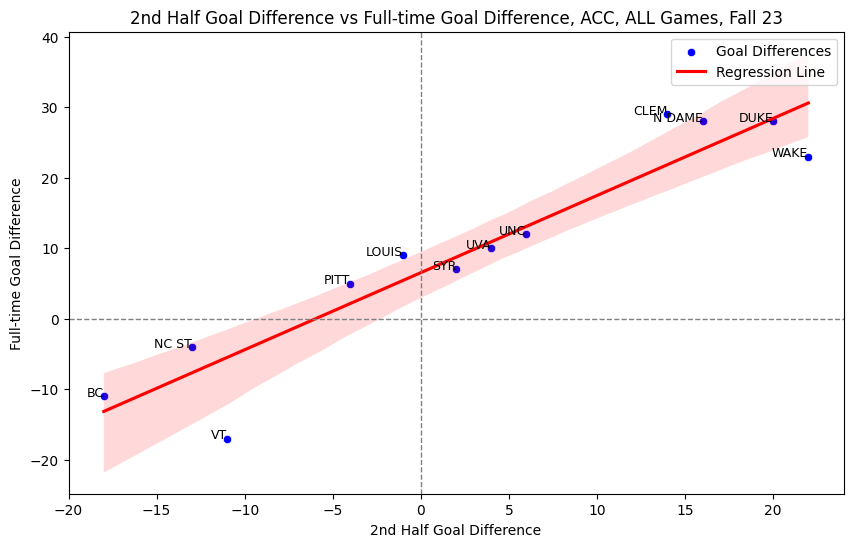

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference, ALL Games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2GD', y='GD', data=ACC_F23_Merged, color='blue', label='Goal Differences')
sns.regplot(x='2GD', y='GD', data=ACC_F23_Merged, scatter=False, color='red', label='Regression Line')
# Add team labels to the plot
for index, row in ACC_F23_Merged.iterrows():
    plt.text(row['2GD'],
                 row['GD'],
                 row['Teams'],
                 fontsize=9, ha='right')

plt.title('2nd Half Goal Difference vs Full-time Goal Difference, ACC, ALL Games, Fall 23')
plt.xlabel('2nd Half Goal Difference')
plt.ylabel('Full-time Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = ACC_F23_Merged[['2GD', 'GD']].corr()
print("correlation matrix: " )
print(correlation_matrix)

correlation matrix: 
         2GD       GD
2GD  1.00000  0.93992
GD   0.93992  1.00000


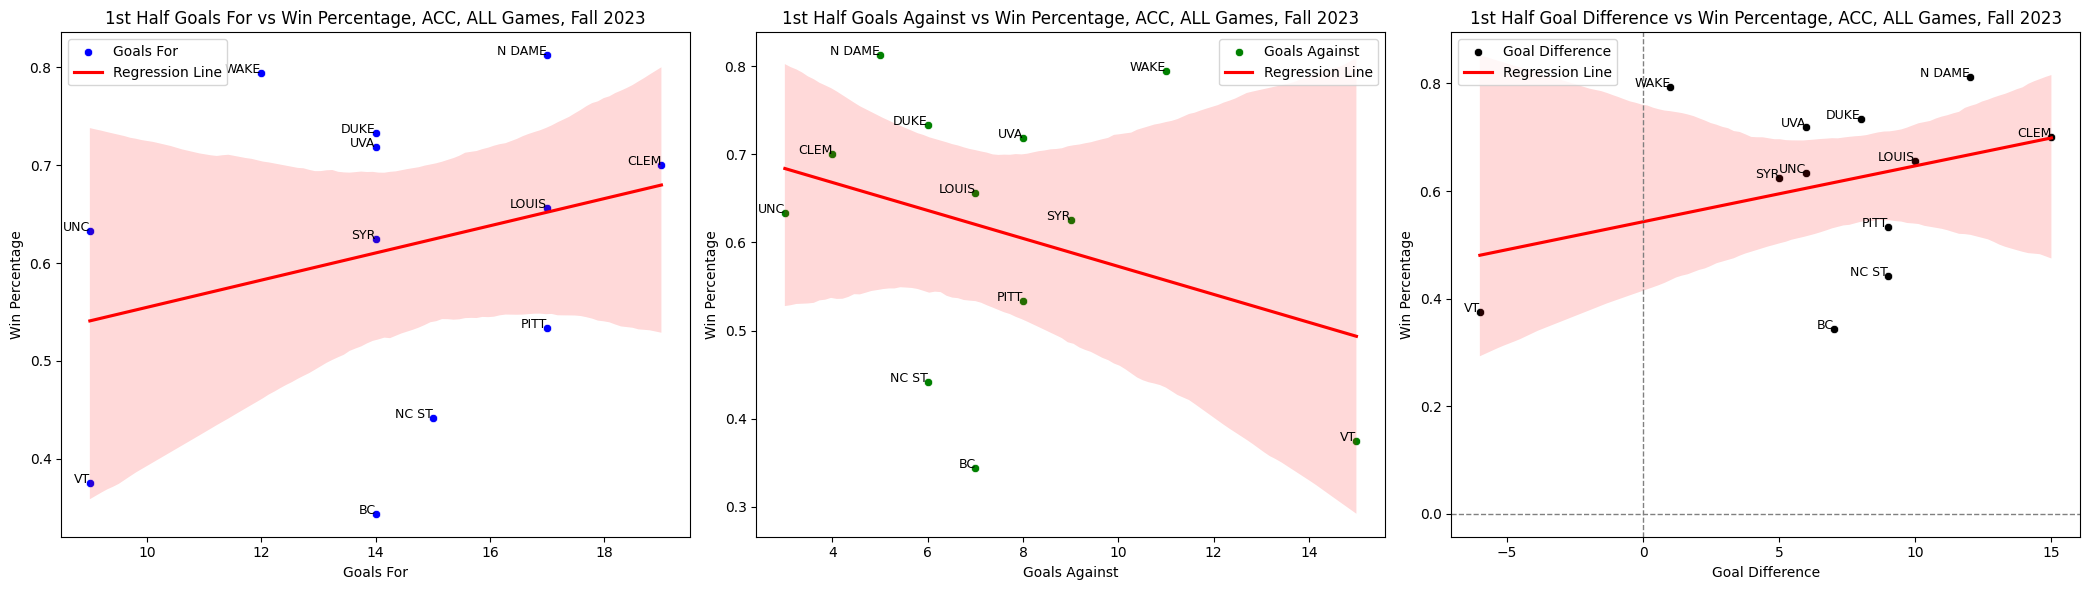

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Fit the linear models
gf_lm = smf.ols(formula='HTGF ~ wpc', data=ACC_F23_Merged).fit()
ga_lm = smf.ols(formula='HTGA ~ wpc', data=ACC_F23_Merged).fit()
gdf_lm = smf.ols(formula='HTGD ~ wpc', data=ACC_F23_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='HTGF', y='wpc', data=ACC_F23_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='HTGF', y='wpc', data=ACC_F23_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('1st Half Goals For vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for index, row in ACC_F23_Merged.iterrows():
    axes[0].text(row['HTGF'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='HTGA', y='wpc', data=ACC_F23_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='HTGA', y='wpc', data=ACC_F23_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('1st Half Goals Against vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for index, row in ACC_F23_Merged.iterrows():
    axes[1].text(row['HTGA'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')


axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='HTGD', y='wpc', data=ACC_F23_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='HTGD', y='wpc', data=ACC_F23_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('1st Half Goal Difference vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for index, row in ACC_F23_Merged.iterrows():
    axes[2].text(row['HTGD'],
                 row['wpc'],
                 row['Teams'],
                 fontsize=9, ha='right')

axes[2].legend()
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# Fit the linear models
gf_lm = smf.ols(formula='2GF ~ wpc', data=ACC_F23_Merged).fit()
ga_lm = smf.ols(formula='2GA ~ wpc', data=ACC_F23_Merged).fit()
gdf_lm = smf.ols(formula='2GD ~ wpc', data=ACC_F23_Merged).fit()

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # Adjusted figsize to accommodate three plots

# Scatter plot and regression line for GF ~ wpc
sns.scatterplot(x='2GF', y='wpc', data=ACC_F23_Merged, ax=axes[0], color='blue', label='Goals For')
sns.regplot(x='2GF', y='wpc', data=ACC_F23_Merged, ax=axes[0], scatter=False, color='red', label='Regression Line')
axes[0].set_title('Goals For vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[0].set_xlabel('Goals For')
axes[0].set_ylabel('Win Percentage')

# Add team labels to the GF plot
for index, row in ACC_F23_Merged.iterrows():
    axes[0].text(row['2GF'], row['wpc'], row['Teams'], fontsize=9, ha='right')
axes[0].legend()

# Scatter plot and regression line for GA ~ wpc
sns.scatterplot(x='2GA', y='wpc', data=ACC_F23_Merged, ax=axes[1], color='green', label='Goals Against')
sns.regplot(x='2GA', y='wpc', data=ACC_F23_Merged, ax=axes[1], scatter=False, color='red', label='Regression Line')
axes[1].set_title('Goals Against vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[1].set_xlabel('Goals Against')
axes[1].set_ylabel('Win Percentage')

# Add team labels to the GA plot
for index, row in ACC_F23_Merged.iterrows():
    axes[1].text(row['2GA'], row['wpc'], row['Teams'], fontsize=9, ha='right')
axes[1].legend()

# Scatter plot and regression line for GD ~ wpc
sns.scatterplot(x='2GD', y='wpc', data=ACC_F23_Merged, ax=axes[2], color='black', label='Goal Difference')
sns.regplot(x='2GD', y='wpc', data=ACC_F23_Merged, ax=axes[2], scatter=False, color='red', label='Regression Line')
axes[2].set_title('Goal Difference vs Win Percentage, ACC, ALL Games, Fall 2023')
axes[2].set_xlabel('Goal Difference')
axes[2].set_ylabel('Win Percentage')

# Add team labels to the GD plot
for index, row in ACC_F23_Merged.iterrows():
    axes[2].text(row['2GD'], row['wpc'], row['Teams'], fontsize=9, ha='right')
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<unknown>, line 1)

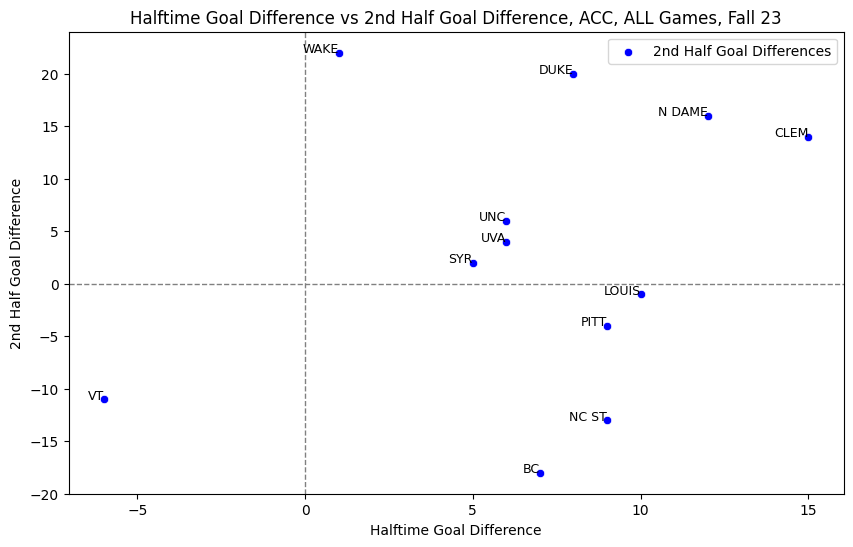

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGD', y='2GD', data=ACC_F23_Merged, color='blue', label='2nd Half Goal Differences')
# sns.regplot(x='HTGD', y='2GD', data=ACC_F23_Merged, scatter=False, color='red', label='Regression Line')

# Iterate over the rows of the DataFrame using iterrows()
for index, row in ACC_F23_Merged.iterrows():
    plt.text(row['HTGD'], row['2GD'], row['Teams'], fontsize=9, ha='right')

plt.title('Halftime Goal Difference vs 2nd Half Goal Difference, ACC, ALL Games, Fall 23')
plt.xlabel('Halftime Goal Difference')
plt.ylabel('2nd Half Goal Difference')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

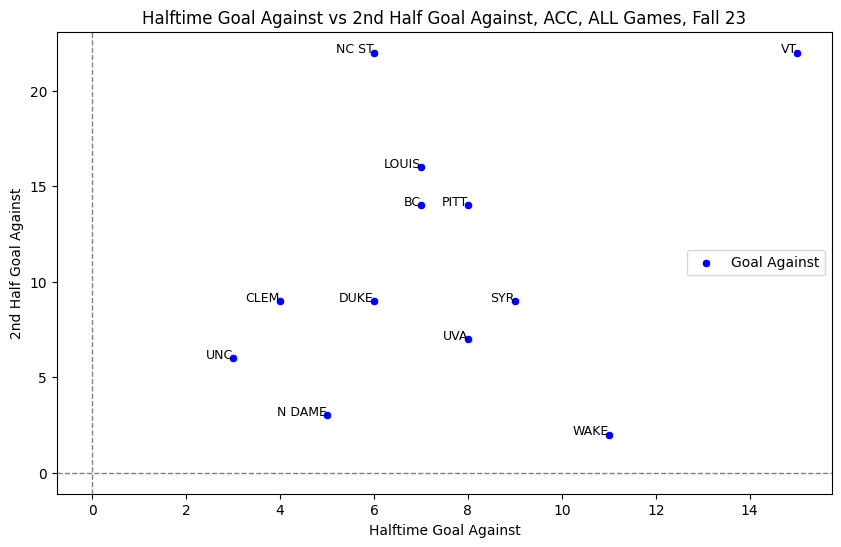

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGA', y='2GA', data=ACC_F23_Merged, color='blue', label='Goal Against')
# sns.regplot(x='HTGD', y='2GD', data=ACC_F23_Merged, scatter=False, color='red', label='Regression Line')

# Iterate over the rows of the DataFrame using iterrows()
for index, row in ACC_F23_Merged.iterrows():
    plt.text(row['HTGA'], row['2GA'], row['Teams'], fontsize=9, ha='right')

plt.title('Halftime Goal Against vs 2nd Half Goal Against, ACC, ALL Games, Fall 23')
plt.xlabel('Halftime Goal Against')
plt.ylabel('2nd Half Goal Against')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

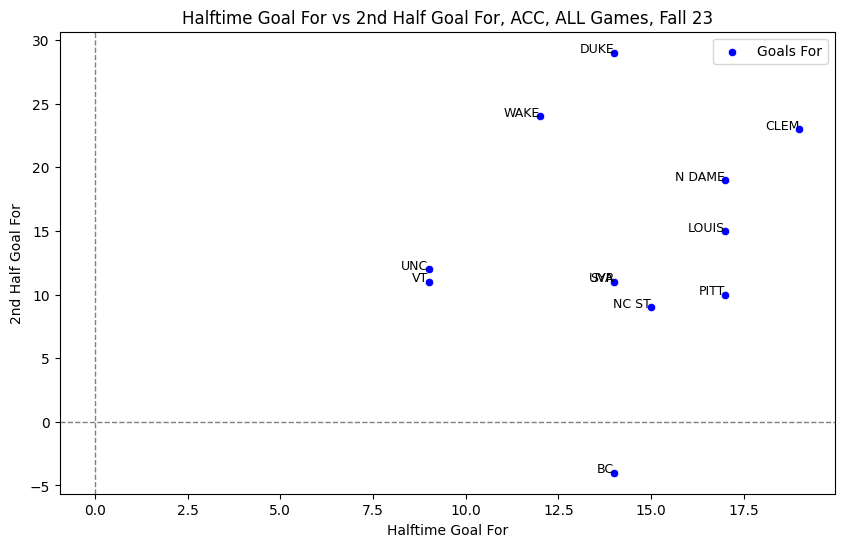

In [ ]:
# Plot Halftime Goal Difference vs Full-time Goal Difference
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HTGF', y='2GF', data=ACC_F23_Merged, color='blue', label='Goals For')
# sns.regplot(x='HTGD', y='2GD', data=ACC_F23_Merged, scatter=False, color='red', label='Regression Line')

# Iterate over the rows of the DataFrame using iterrows()
for index, row in ACC_F23_Merged.iterrows():
    plt.text(row['HTGF'], row['2GF'], row['Teams'], fontsize=9, ha='right')

plt.title('Halftime Goal For vs 2nd Half Goal For, ACC, ALL Games, Fall 23')
plt.xlabel('Halftime Goal For')
plt.ylabel('2nd Half Goal For')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [ ]:
ACC_F23_Merged['2GFRatio'] = ACC_F23_Merged['2GF'] / ACC_F23_Merged['HTGF']
ACC_F23_Merged['2GARatio'] = ACC_F23_Merged['2GA'] / ACC_F23_Merged['HTGA']
ACC_F23_Merged['1GFRatio'] = ACC_F23_Merged['HTGF'] / ACC_F23_Merged['2GF']
ACC_F23_Merged['1GARatio'] = ACC_F23_Merged['HTGA'] / ACC_F23_Merged['2GA']
ACC_F23_Merged['GF/GARatio'] = ACC_F23_Merged['GF'] / ACC_F23_Merged['GA']
ACC_F23_Merged

<ipython-input-37-821af07fb88b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged['2GFRatio'] = ACC_F23_Merged['2GF'] / ACC_F23_Merged['HTGF']
<ipython-input-37-821af07fb88b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged['2GARatio'] = ACC_F23_Merged['2GA'] / ACC_F23_Merged['HTGA']
<ipython-input-37-821af07fb88b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,BC,5,0.0,2,7,1,13,11,5.5,7,5,9,8,5.5,16,10,21,-11,7,14,7,-4,14,-18,-25,0.000000,0.500000,0.343750,0.184843,0.800000,0.075472,-0.724528,-0.285714,2.000000,-3.500000,0.500000,0.476190
1,CLEM,5,2.0,2,3,7,8,10,8.5,16,2,35,5,10.5,15,42,13,29,4,19,15,23,9,14,-1,0.400000,0.850000,0.700000,0.912571,0.957560,0.867213,-0.090347,1.210526,2.250000,0.826087,0.444444,3.230769
2,DUKE,5,1.5,1,4,3,5,10,9.5,10,5,40,10,11.0,15,43,15,28,6,14,8,29,9,20,12,0.300000,0.950000,0.733333,0.891514,0.844828,0.912148,0.067320,2.071429,1.500000,0.482759,0.666667,2.866667
4,LOUIS,7,3.5,3,5,10,11,9,7.0,12,4,22,12,10.5,16,32,23,9,7,17,10,15,16,-1,-11,0.500000,0.777778,0.656250,0.659369,0.855030,0.467775,-0.387254,0.882353,2.285714,1.133333,0.437500,1.391304
6,N DAME,6,4.5,1,2,9,3,10,8.5,15,4,27,5,13.0,16,36,8,28,5,17,12,19,3,16,4,0.750000,0.850000,0.812500,0.952941,0.920382,0.975676,0.055294,1.117647,0.600000,0.894737,1.666667,4.500000
7,NC ST,6,0.5,2,7,6,16,11,7.0,8,4,18,12,7.5,17,24,28,-4,6,15,9,9,22,-13,-22,0.083333,0.636364,0.441176,0.423529,0.862069,0.143363,-0.718706,0.600000,3.666667,1.666667,0.272727,0.857143
9,PITT,5,0.5,3,8,4,15,10,7.5,9,5,23,7,8.0,15,27,22,5,8,17,9,10,14,-4,-13,0.100000,0.750000,0.533333,0.600989,0.818697,0.337838,-0.480859,0.588235,1.750000,1.700000,0.571429,1.227273
10,SYR,6,2.5,5,4,8,10,10,7.5,10,4,17,8,10.0,16,25,18,7,9,14,5,11,9,2,-3,0.416667,0.750000,0.625000,0.658588,0.707581,0.599010,-0.108571,0.785714,1.000000,1.272727,1.000000,1.388889
12,UNC,6,3.0,0,1,7,5,9,6.5,8,3,14,4,9.5,15,21,9,12,3,9,6,12,6,6,0,0.500000,0.722222,0.633333,0.844828,0.900000,0.800000,-0.100000,1.333333,2.000000,0.750000,0.500000,2.333333
13,UVA,5,2.0,3,3,6,7,11,9.5,11,5,19,8,11.5,16,25,15,10,8,14,6,11,7,4,-2,0.400000,0.863636,0.718750,0.735294,0.753846,0.711765,-0.042081,0.785714,0.875000,1.272727,1.142857,1.666667


<ipython-input-38-95ff211ffea9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-38-95ff211ffea9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.dropna(subset=['2GFRatio'], inplace=True)
<ipython-input-38-95ff211ffea9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GFRatio', y='Teams', data=ACC_F23_Merged_sorted, palette='Blues_d')


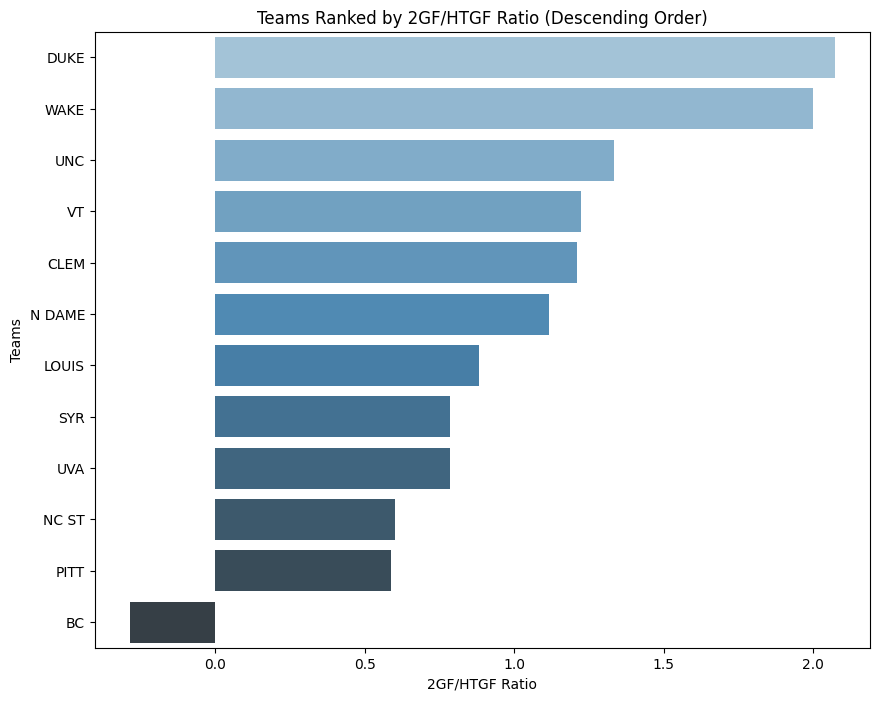

In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_Merged.dropna(subset=['2GFRatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_Merged_sorted = ACC_F23_Merged.sort_values('2GFRatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GFRatio', y='Teams', data=ACC_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by 2GF/HTGF Ratio (Descending Order)')
plt.xlabel('2GF/HTGF Ratio')
plt.ylabel('Teams')
plt.show()

<ipython-input-39-1f785bfbb345>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-39-1f785bfbb345>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.dropna(subset=['2GARatio'], inplace=True)
<ipython-input-39-1f785bfbb345>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='2GARatio', y='Teams', data=ACC_F23_Merged_sorted, palette='Reds_d')


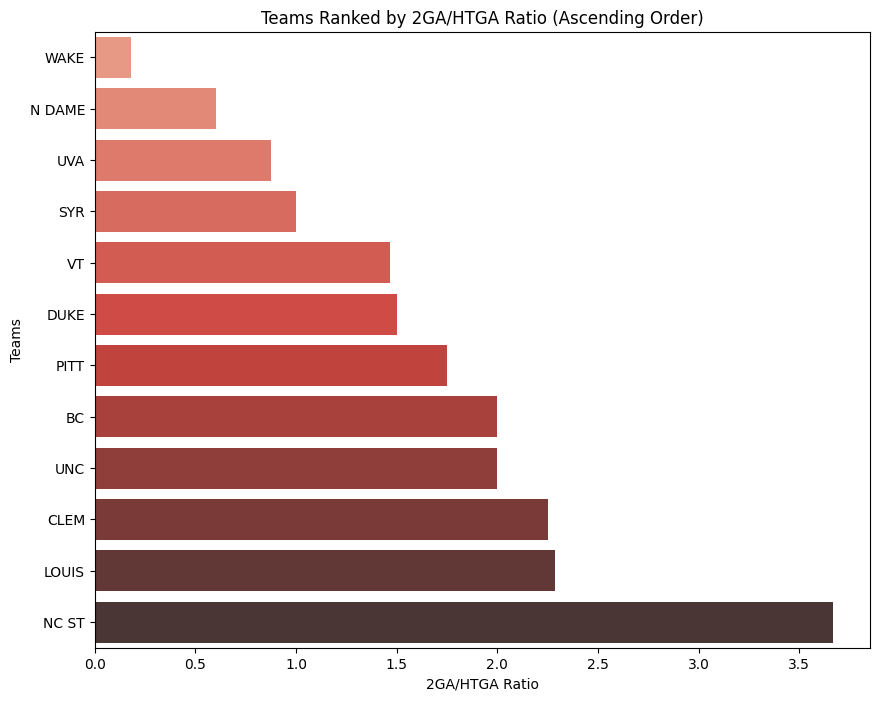

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
15,WAKE,6,4.0,7,3,9,6,11,9.5,9,4,27,7,13.5,17,36,13,23,11,12,1,24,2,22,21,0.666667,0.863636,0.794118,0.884642,0.543396,0.993103,0.449707,2.000000,0.181818,0.500000,5.500000,2.769231
6,N DAME,6,4.5,1,2,9,3,10,8.5,15,4,27,5,13.0,16,36,8,28,5,17,12,19,3,16,4,0.750000,0.850000,0.812500,0.952941,0.920382,0.975676,0.055294,1.117647,0.600000,0.894737,1.666667,4.500000
13,UVA,5,2.0,3,3,6,7,11,9.5,11,5,19,8,11.5,16,25,15,10,8,14,6,11,7,4,-2,0.400000,0.863636,0.718750,0.735294,0.753846,0.711765,-0.042081,0.785714,0.875000,1.272727,1.142857,1.666667
10,SYR,6,2.5,5,4,8,10,10,7.5,10,4,17,8,10.0,16,25,18,7,9,14,5,11,9,2,-3,0.416667,0.750000,0.625000,0.658588,0.707581,0.599010,-0.108571,0.785714,1.000000,1.272727,1.000000,1.388889
14,VT,5,2.0,5,5,8,15,11,4.0,4,10,12,22,6.0,16,20,37,-17,15,9,-6,11,22,-11,-5,0.400000,0.363636,0.375000,0.226116,0.264706,0.200000,-0.064706,1.222222,1.466667,0.818182,0.681818,0.540541
2,DUKE,5,1.5,1,4,3,5,10,9.5,10,5,40,10,11.0,15,43,15,28,6,14,8,29,9,20,12,0.300000,0.950000,0.733333,0.891514,0.844828,0.912148,0.067320,2.071429,1.500000,0.482759,0.666667,2.866667
9,PITT,5,0.5,3,8,4,15,10,7.5,9,5,23,7,8.0,15,27,22,5,8,17,9,10,14,-4,-13,0.100000,0.750000,0.533333,0.600989,0.818697,0.337838,-0.480859,0.588235,1.750000,1.700000,0.571429,1.227273
0,BC,5,0.0,2,7,1,13,11,5.5,7,5,9,8,5.5,16,10,21,-11,7,14,7,-4,14,-18,-25,0.000000,0.500000,0.343750,0.184843,0.800000,0.075472,-0.724528,-0.285714,2.000000,-3.500000,0.500000,0.476190
12,UNC,6,3.0,0,1,7,5,9,6.5,8,3,14,4,9.5,15,21,9,12,3,9,6,12,6,6,0,0.500000,0.722222,0.633333,0.844828,0.900000,0.800000,-0.100000,1.333333,2.000000,0.750000,0.500000,2.333333
1,CLEM,5,2.0,2,3,7,8,10,8.5,16,2,35,5,10.5,15,42,13,29,4,19,15,23,9,14,-1,0.400000,0.850000,0.700000,0.912571,0.957560,0.867213,-0.090347,1.210526,2.250000,0.826087,0.444444,3.230769


In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_Merged.dropna(subset=['2GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_Merged_sorted = ACC_F23_Merged.sort_values('2GARatio', ascending = True)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='2GARatio', y='Teams', data=ACC_F23_Merged_sorted, palette='Reds_d')

plt.title('Teams Ranked by 2GA/HTGA Ratio (Ascending Order)')
plt.xlabel('2GA/HTGA Ratio')
plt.ylabel('Teams')
plt.show()

ACC_F23_Merged_sorted

<ipython-input-40-a4a16827a369>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-40-a4a16827a369>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.dropna(subset=['GF/GARatio'], inplace=True)
<ipython-input-40-a4a16827a369>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GF/GARatio', y='Teams', data=ACC_F23_Merged_sorted, palette='Blues_d')


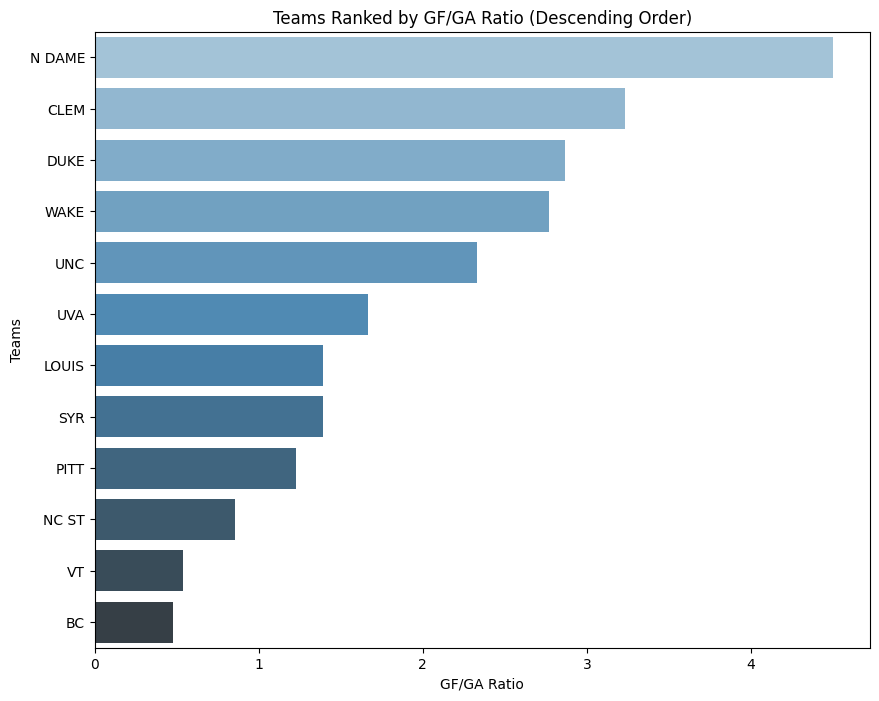

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
6,N DAME,6,4.5,1,2,9,3,10,8.5,15,4,27,5,13.0,16,36,8,28,5,17,12,19,3,16,4,0.750000,0.850000,0.812500,0.952941,0.920382,0.975676,0.055294,1.117647,0.600000,0.894737,1.666667,4.500000
1,CLEM,5,2.0,2,3,7,8,10,8.5,16,2,35,5,10.5,15,42,13,29,4,19,15,23,9,14,-1,0.400000,0.850000,0.700000,0.912571,0.957560,0.867213,-0.090347,1.210526,2.250000,0.826087,0.444444,3.230769
2,DUKE,5,1.5,1,4,3,5,10,9.5,10,5,40,10,11.0,15,43,15,28,6,14,8,29,9,20,12,0.300000,0.950000,0.733333,0.891514,0.844828,0.912148,0.067320,2.071429,1.500000,0.482759,0.666667,2.866667
15,WAKE,6,4.0,7,3,9,6,11,9.5,9,4,27,7,13.5,17,36,13,23,11,12,1,24,2,22,21,0.666667,0.863636,0.794118,0.884642,0.543396,0.993103,0.449707,2.000000,0.181818,0.500000,5.500000,2.769231
12,UNC,6,3.0,0,1,7,5,9,6.5,8,3,14,4,9.5,15,21,9,12,3,9,6,12,6,6,0,0.500000,0.722222,0.633333,0.844828,0.900000,0.800000,-0.100000,1.333333,2.000000,0.750000,0.500000,2.333333
13,UVA,5,2.0,3,3,6,7,11,9.5,11,5,19,8,11.5,16,25,15,10,8,14,6,11,7,4,-2,0.400000,0.863636,0.718750,0.735294,0.753846,0.711765,-0.042081,0.785714,0.875000,1.272727,1.142857,1.666667
4,LOUIS,7,3.5,3,5,10,11,9,7.0,12,4,22,12,10.5,16,32,23,9,7,17,10,15,16,-1,-11,0.500000,0.777778,0.656250,0.659369,0.855030,0.467775,-0.387254,0.882353,2.285714,1.133333,0.437500,1.391304
10,SYR,6,2.5,5,4,8,10,10,7.5,10,4,17,8,10.0,16,25,18,7,9,14,5,11,9,2,-3,0.416667,0.750000,0.625000,0.658588,0.707581,0.599010,-0.108571,0.785714,1.000000,1.272727,1.000000,1.388889
9,PITT,5,0.5,3,8,4,15,10,7.5,9,5,23,7,8.0,15,27,22,5,8,17,9,10,14,-4,-13,0.100000,0.750000,0.533333,0.600989,0.818697,0.337838,-0.480859,0.588235,1.750000,1.700000,0.571429,1.227273
7,NC ST,6,0.5,2,7,6,16,11,7.0,8,4,18,12,7.5,17,24,28,-4,6,15,9,9,22,-13,-22,0.083333,0.636364,0.441176,0.423529,0.862069,0.143363,-0.718706,0.600000,3.666667,1.666667,0.272727,0.857143


In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_Merged.dropna(subset=['GF/GARatio'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_Merged_sorted = ACC_F23_Merged.sort_values('GF/GARatio', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='GF/GARatio', y='Teams', data=ACC_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by GF/GA Ratio (Descending Order)')
plt.xlabel('GF/GA Ratio')
plt.ylabel('Teams')
plt.show()

ACC_F23_Merged_sorted

<ipython-input-66-0ae0fdfd7280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-66-0ae0fdfd7280>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.dropna(subset=['hwpc'], inplace=True)
<ipython-input-66-0ae0fdfd7280>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hwpc', y='Teams', data=ACC_F23_Merged_sorted, palette='Blues_d')


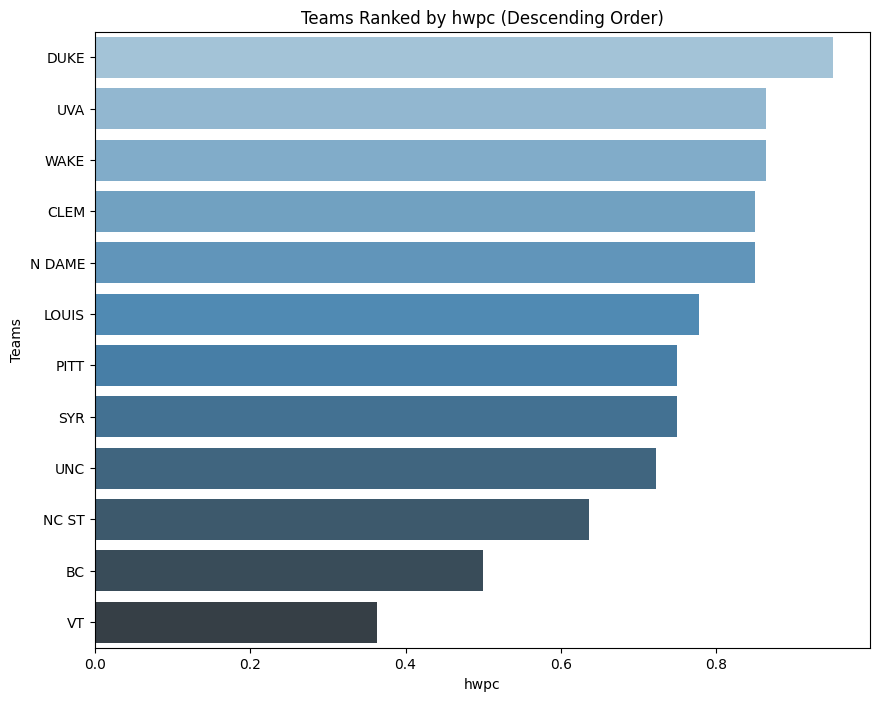

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
2,DUKE,5,1.5,1,4,3,5,10,9.5,10,5,40,10,11.0,15,43,15,28,6,14,8,29,9,20,12,0.300000,0.950000,0.315789,0.733333,0.891514,0.844828,0.912148,0.067320
13,UVA,5,2.0,3,3,6,7,11,9.5,11,5,19,8,11.5,16,25,15,10,8,14,6,11,7,4,-2,0.400000,0.863636,0.463158,0.718750,0.735294,0.753846,0.711765,-0.042081
15,WAKE,6,4.0,7,3,9,6,11,9.5,9,4,27,7,13.5,17,36,13,23,11,12,1,24,2,22,21,0.666667,0.863636,0.771930,0.794118,0.884642,0.543396,0.993103,0.449707
1,CLEM,5,2.0,2,3,7,8,10,8.5,16,2,35,5,10.5,15,42,13,29,4,19,15,23,9,14,-1,0.400000,0.850000,0.470588,0.700000,0.912571,0.957560,0.867213,-0.090347
6,N DAME,6,4.5,1,2,9,3,10,8.5,15,4,27,5,13.0,16,36,8,28,5,17,12,19,3,16,4,0.750000,0.850000,0.882353,0.812500,0.952941,0.920382,0.975676,0.055294
4,LOUIS,7,3.5,3,5,10,11,9,7.0,12,4,22,12,10.5,16,32,23,9,7,17,10,15,16,-1,-11,0.500000,0.777778,0.642857,0.656250,0.659369,0.855030,0.467775,-0.387254
9,PITT,5,0.5,3,8,4,15,10,7.5,9,5,23,7,8.0,15,27,22,5,8,17,9,10,14,-4,-13,0.100000,0.750000,0.133333,0.533333,0.600989,0.818697,0.337838,-0.480859
10,SYR,6,2.5,5,4,8,10,10,7.5,10,4,17,8,10.0,16,25,18,7,9,14,5,11,9,2,-3,0.416667,0.750000,0.555556,0.625000,0.658588,0.707581,0.599010,-0.108571
12,UNC,6,3.0,0,1,7,5,9,6.5,8,3,14,4,9.5,15,21,9,12,3,9,6,12,6,6,0,0.500000,0.722222,0.692308,0.633333,0.844828,0.900000,0.800000,-0.100000
7,NC ST,6,0.5,2,7,6,16,11,7.0,8,4,18,12,7.5,17,24,28,-4,6,15,9,9,22,-13,-22,0.083333,0.636364,0.130952,0.441176,0.423529,0.862069,0.143363,-0.718706


In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_Merged.dropna(subset=['hwpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_Merged_sorted = ACC_F23_Merged.sort_values('hwpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='hwpc', y='Teams', data=ACC_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by hwpc (Descending Order)')
plt.xlabel('hwpc')
plt.ylabel('Teams')
plt.show()

ACC_F23_Merged_sorted

<ipython-input-64-31b5b9f89bd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-64-31b5b9f89bd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.dropna(subset=['awpc'], inplace=True)
<ipython-input-64-31b5b9f89bd9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awpc', y='Teams', data=ACC_F23_Merged_sorted, palette='Blues_d')


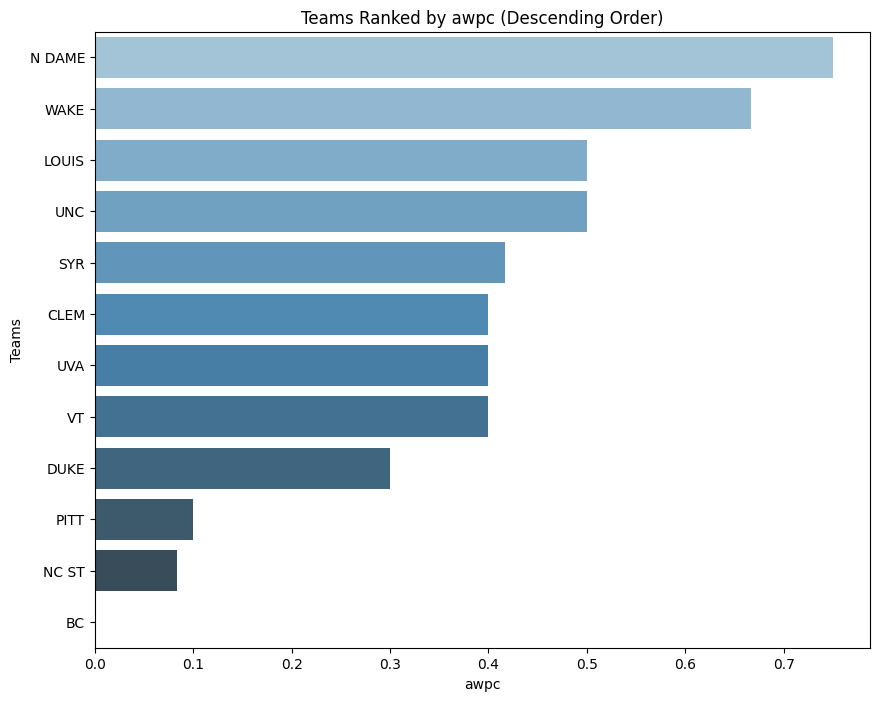

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
6,N DAME,6,4.5,1,2,9,3,10,8.5,15,4,27,5,13.0,16,36,8,28,5,17,12,19,3,16,4,0.750000,0.850000,0.882353,0.812500,0.952941,0.920382,0.975676,0.055294
15,WAKE,6,4.0,7,3,9,6,11,9.5,9,4,27,7,13.5,17,36,13,23,11,12,1,24,2,22,21,0.666667,0.863636,0.771930,0.794118,0.884642,0.543396,0.993103,0.449707
4,LOUIS,7,3.5,3,5,10,11,9,7.0,12,4,22,12,10.5,16,32,23,9,7,17,10,15,16,-1,-11,0.500000,0.777778,0.642857,0.656250,0.659369,0.855030,0.467775,-0.387254
12,UNC,6,3.0,0,1,7,5,9,6.5,8,3,14,4,9.5,15,21,9,12,3,9,6,12,6,6,0,0.500000,0.722222,0.692308,0.633333,0.844828,0.900000,0.800000,-0.100000
10,SYR,6,2.5,5,4,8,10,10,7.5,10,4,17,8,10.0,16,25,18,7,9,14,5,11,9,2,-3,0.416667,0.750000,0.555556,0.625000,0.658588,0.707581,0.599010,-0.108571
1,CLEM,5,2.0,2,3,7,8,10,8.5,16,2,35,5,10.5,15,42,13,29,4,19,15,23,9,14,-1,0.400000,0.850000,0.470588,0.700000,0.912571,0.957560,0.867213,-0.090347
13,UVA,5,2.0,3,3,6,7,11,9.5,11,5,19,8,11.5,16,25,15,10,8,14,6,11,7,4,-2,0.400000,0.863636,0.463158,0.718750,0.735294,0.753846,0.711765,-0.042081
14,VT,5,2.0,5,5,8,15,11,4.0,4,10,12,22,6.0,16,20,37,-17,15,9,-6,11,22,-11,-5,0.400000,0.363636,1.100000,0.375000,0.226116,0.264706,0.200000,-0.064706
2,DUKE,5,1.5,1,4,3,5,10,9.5,10,5,40,10,11.0,15,43,15,28,6,14,8,29,9,20,12,0.300000,0.950000,0.315789,0.733333,0.891514,0.844828,0.912148,0.067320
9,PITT,5,0.5,3,8,4,15,10,7.5,9,5,23,7,8.0,15,27,22,5,8,17,9,10,14,-4,-13,0.100000,0.750000,0.133333,0.533333,0.600989,0.818697,0.337838,-0.480859


In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_Merged.dropna(subset=['awpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_Merged_sorted = ACC_F23_Merged.sort_values('awpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='awpc', y='Teams', data=ACC_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by awpc (Descending Order)')
plt.xlabel('awpc')
plt.ylabel('Teams')
plt.show()

ACC_F23_Merged_sorted

<ipython-input-67-efd5f57cd8de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
<ipython-input-67-efd5f57cd8de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_F23_Merged.dropna(subset=['awpc:hwpc'], inplace=True)
<ipython-input-67-efd5f57cd8de>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='awpc:hwpc', y='Teams', data=ACC_F23_Merged_sorted, palette='Blues_d')


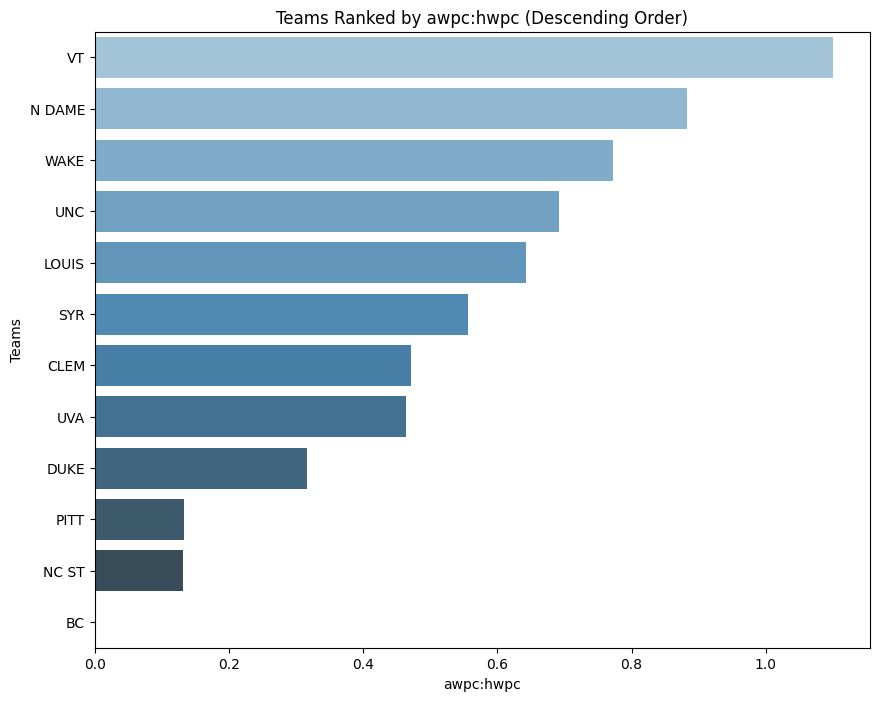

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,awpc:hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff
14,VT,5,2.0,5,5,8,15,11,4.0,4,10,12,22,6.0,16,20,37,-17,15,9,-6,11,22,-11,-5,0.400000,0.363636,1.100000,0.375000,0.226116,0.264706,0.200000,-0.064706
6,N DAME,6,4.5,1,2,9,3,10,8.5,15,4,27,5,13.0,16,36,8,28,5,17,12,19,3,16,4,0.750000,0.850000,0.882353,0.812500,0.952941,0.920382,0.975676,0.055294
15,WAKE,6,4.0,7,3,9,6,11,9.5,9,4,27,7,13.5,17,36,13,23,11,12,1,24,2,22,21,0.666667,0.863636,0.771930,0.794118,0.884642,0.543396,0.993103,0.449707
12,UNC,6,3.0,0,1,7,5,9,6.5,8,3,14,4,9.5,15,21,9,12,3,9,6,12,6,6,0,0.500000,0.722222,0.692308,0.633333,0.844828,0.900000,0.800000,-0.100000
4,LOUIS,7,3.5,3,5,10,11,9,7.0,12,4,22,12,10.5,16,32,23,9,7,17,10,15,16,-1,-11,0.500000,0.777778,0.642857,0.656250,0.659369,0.855030,0.467775,-0.387254
10,SYR,6,2.5,5,4,8,10,10,7.5,10,4,17,8,10.0,16,25,18,7,9,14,5,11,9,2,-3,0.416667,0.750000,0.555556,0.625000,0.658588,0.707581,0.599010,-0.108571
1,CLEM,5,2.0,2,3,7,8,10,8.5,16,2,35,5,10.5,15,42,13,29,4,19,15,23,9,14,-1,0.400000,0.850000,0.470588,0.700000,0.912571,0.957560,0.867213,-0.090347
13,UVA,5,2.0,3,3,6,7,11,9.5,11,5,19,8,11.5,16,25,15,10,8,14,6,11,7,4,-2,0.400000,0.863636,0.463158,0.718750,0.735294,0.753846,0.711765,-0.042081
2,DUKE,5,1.5,1,4,3,5,10,9.5,10,5,40,10,11.0,15,43,15,28,6,14,8,29,9,20,12,0.300000,0.950000,0.315789,0.733333,0.891514,0.844828,0.912148,0.067320
9,PITT,5,0.5,3,8,4,15,10,7.5,9,5,23,7,8.0,15,27,22,5,8,17,9,10,14,-4,-13,0.100000,0.750000,0.133333,0.533333,0.600989,0.818697,0.337838,-0.480859


In [ ]:
# Handle any potential infinite or NaN values (e.g., when HTGF is 0)
ACC_F23_Merged.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
ACC_F23_Merged.dropna(subset=['awpc:hwpc'], inplace=True)

# Sort the DataFrame by the ratio in ascending order
ACC_F23_Merged_sorted = ACC_F23_Merged.sort_values('awpc:hwpc', ascending = False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='awpc:hwpc', y='Teams', data=ACC_F23_Merged_sorted, palette='Blues_d')

plt.title('Teams Ranked by awpc:hwpc (Descending Order)')
plt.xlabel('awpc:hwpc')
plt.ylabel('Teams')
plt.show()

ACC_F23_Merged_sorted

In [ ]:
ACC_F23_Merged

,Teams,Played Home_x,awinvalue,HTAG_x,HTHG_x,Scored_x,Conceded_x,Played Home_y,hwinvalue,HTHG_y,HTAG_y,Scored_y,Conceded_y,W,G,GF,GA,GD,HTGA,HTGF,HTGD,2GF,2GA,2GD,Change_GD,awpc,hwpc,wpc,pyth,pyth_ht,pyth_h2,pyth_diff,2GFRatio,2GARatio,1GFRatio,1GARatio,GF/GARatio
0,BC,5,0.0,2,7,1,13,11,5.5,7,5,9,8,5.5,16,10,21,-11,7,14,7,-4,14,-18,-25,0.000000,0.500000,0.343750,0.184843,0.800000,0.075472,-0.724528,-0.285714,2.000000,-3.500000,0.500000,0.476190
1,CLEM,5,2.0,2,3,7,8,10,8.5,16,2,35,5,10.5,15,42,13,29,4,19,15,23,9,14,-1,0.400000,0.850000,0.700000,0.912571,0.957560,0.867213,-0.090347,1.210526,2.250000,0.826087,0.444444,3.230769
2,DUKE,5,1.5,1,4,3,5,10,9.5,10,5,40,10,11.0,15,43,15,28,6,14,8,29,9,20,12,0.300000,0.950000,0.733333,0.891514,0.844828,0.912148,0.067320,2.071429,1.500000,0.482759,0.666667,2.866667
4,LOUIS,7,3.5,3,5,10,11,9,7.0,12,4,22,12,10.5,16,32,23,9,7,17,10,15,16,-1,-11,0.500000,0.777778,0.656250,0.659369,0.855030,0.467775,-0.387254,0.882353,2.285714,1.133333,0.437500,1.391304
6,N DAME,6,4.5,1,2,9,3,10,8.5,15,4,27,5,13.0,16,36,8,28,5,17,12,19,3,16,4,0.750000,0.850000,0.812500,0.952941,0.920382,0.975676,0.055294,1.117647,0.600000,0.894737,1.666667,4.500000
7,NC ST,6,0.5,2,7,6,16,11,7.0,8,4,18,12,7.5,17,24,28,-4,6,15,9,9,22,-13,-22,0.083333,0.636364,0.441176,0.423529,0.862069,0.143363,-0.718706,0.600000,3.666667,1.666667,0.272727,0.857143
9,PITT,5,0.5,3,8,4,15,10,7.5,9,5,23,7,8.0,15,27,22,5,8,17,9,10,14,-4,-13,0.100000,0.750000,0.533333,0.600989,0.818697,0.337838,-0.480859,0.588235,1.750000,1.700000,0.571429,1.227273
10,SYR,6,2.5,5,4,8,10,10,7.5,10,4,17,8,10.0,16,25,18,7,9,14,5,11,9,2,-3,0.416667,0.750000,0.625000,0.658588,0.707581,0.599010,-0.108571,0.785714,1.000000,1.272727,1.000000,1.388889
12,UNC,6,3.0,0,1,7,5,9,6.5,8,3,14,4,9.5,15,21,9,12,3,9,6,12,6,6,0,0.500000,0.722222,0.633333,0.844828,0.900000,0.800000,-0.100000,1.333333,2.000000,0.750000,0.500000,2.333333
13,UVA,5,2.0,3,3,6,7,11,9.5,11,5,19,8,11.5,16,25,15,10,8,14,6,11,7,4,-2,0.400000,0.863636,0.718750,0.735294,0.753846,0.711765,-0.042081,0.785714,0.875000,1.272727,1.142857,1.666667
